In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
file_path = "results/rsna/scores/scores_04241435.pkl"
with open(file_path, "rb") as file:
    results = pkl.load(file=file)
    desc = results[0]
    scores_list = results[1:]
print(desc)

P mask 2 lr (1e-4, 1e-5). |batch|=512


for changing desc if needed

In [15]:
# change_desc = False
# if change_desc:
#     new_desc = f'1/8th data no mask'
#     results[0] = new_desc
#     with open(file_path, "wb") as file:
#         pkl.dump(obj=results, file=file)

In [7]:
for i, scores in enumerate(scores_list):
    if 'nona l2 mlp' in scores:
        print(abs(scores['nona l2 mlp'][0]))
    elif 'nona euclidean mlp' in scores:
        print(abs(scores['nona euclidean mlp'][0]))

print(i+1, 'splits')

0.006952229421585798
0.00693532545119524
2 splits


In [4]:
scores = {' '.join(method.split()[:-1]) : [abs(scores[method][0]) for scores in scores_list] for method in scores_list[0]}# if 'knn' not in method}

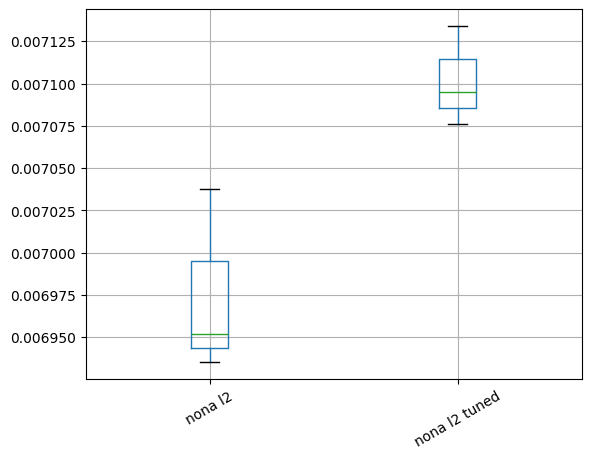

In [5]:
bplot = pd.DataFrame(scores).boxplot(rot=30)
plt.show()
# bplot.set_title('mse on adresso mmse')

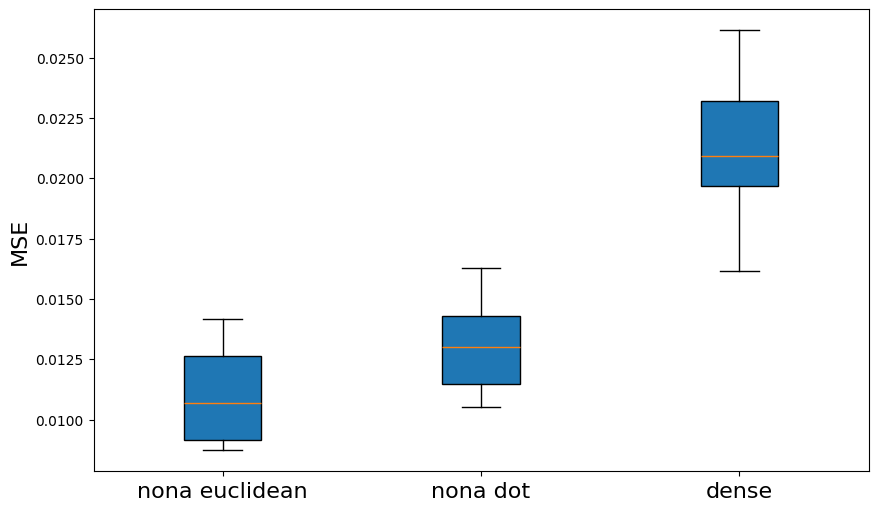

In [41]:
scores = pd.DataFrame(scores)
plt.figure(figsize=(10, 6))
plt.boxplot(scores.values, tick_labels=scores.columns, vert=True, patch_artist=True)
plt.xticks(rotation=0, fontsize=16)
# plt.title(f'{desc} on {date}')
plt.ylabel("MSE", fontsize=16)
# plt.grid(True)
plt.show(block=True)

In [17]:
pd.DataFrame(scores).median()

nona l2 mlp + pointwise    0.024609
nona l2 mlp + uniform      0.024714
nona l2 tuned              0.026545
dtype: float64

In [7]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [8]:
pd.DataFrame(times).median() / 3600

dense mlp          11.590003
dense tuned knn     0.865094
dtype: float64

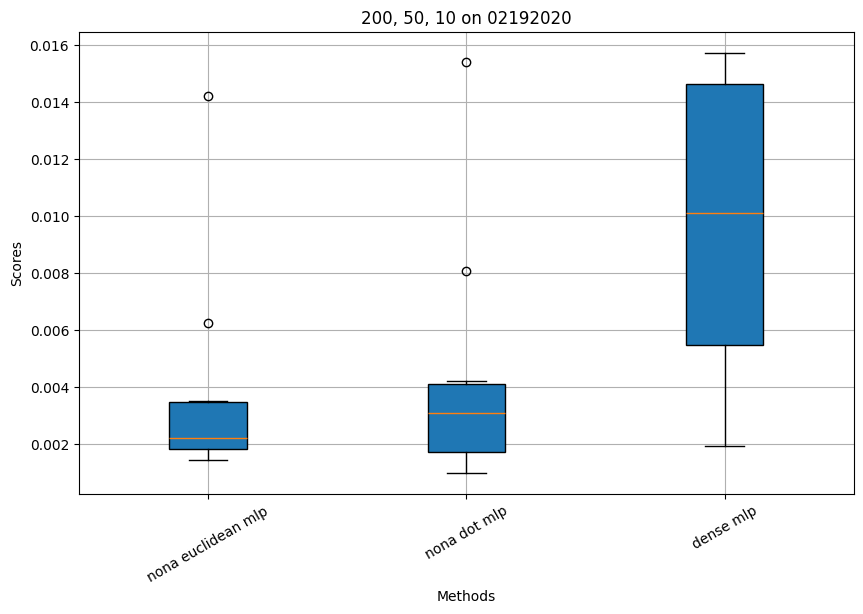

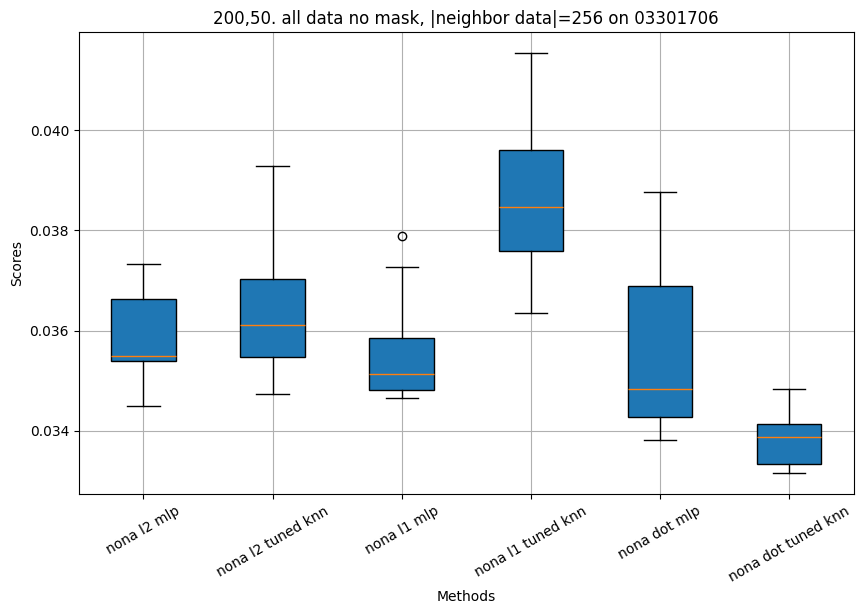

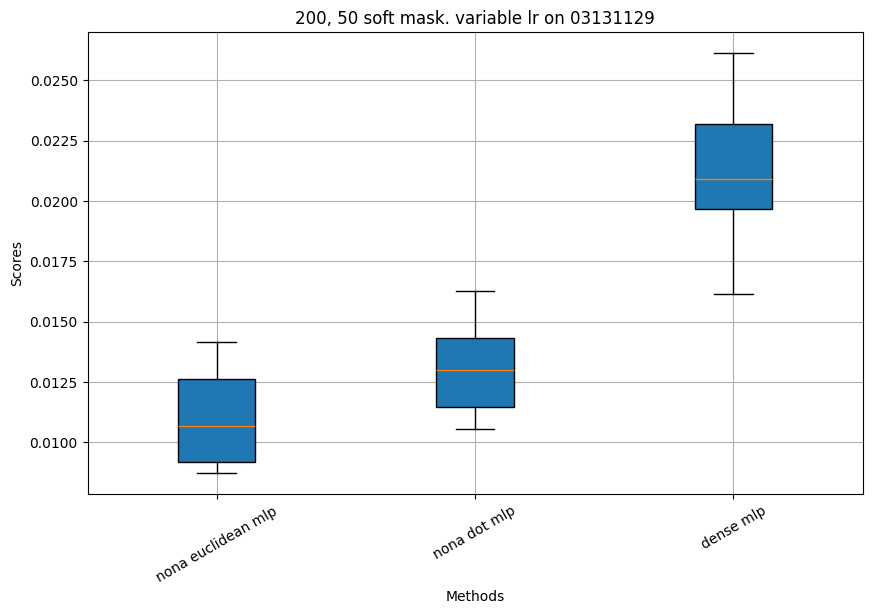

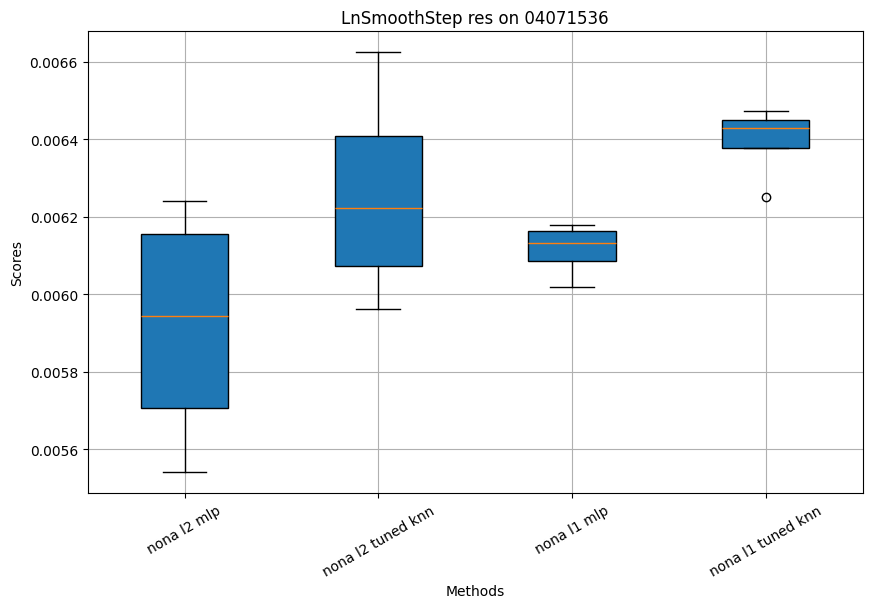

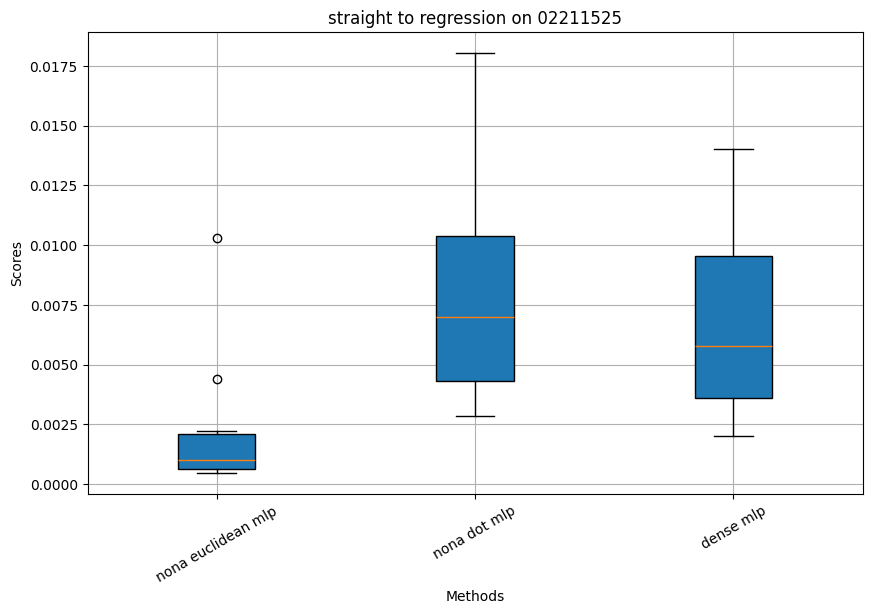

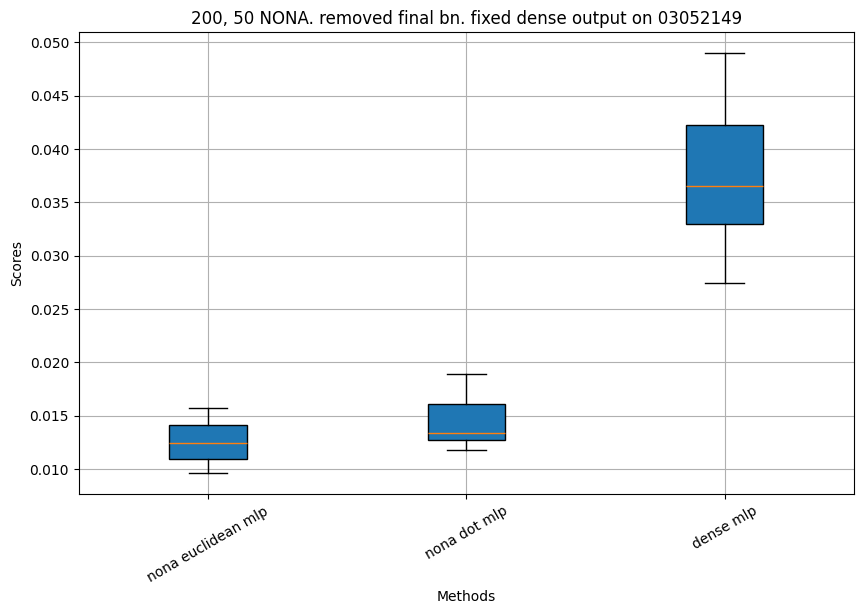

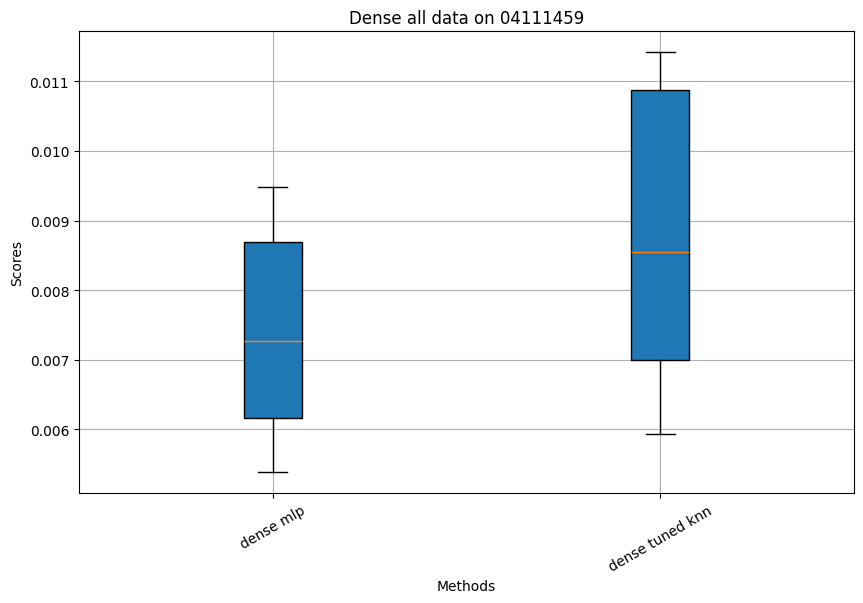

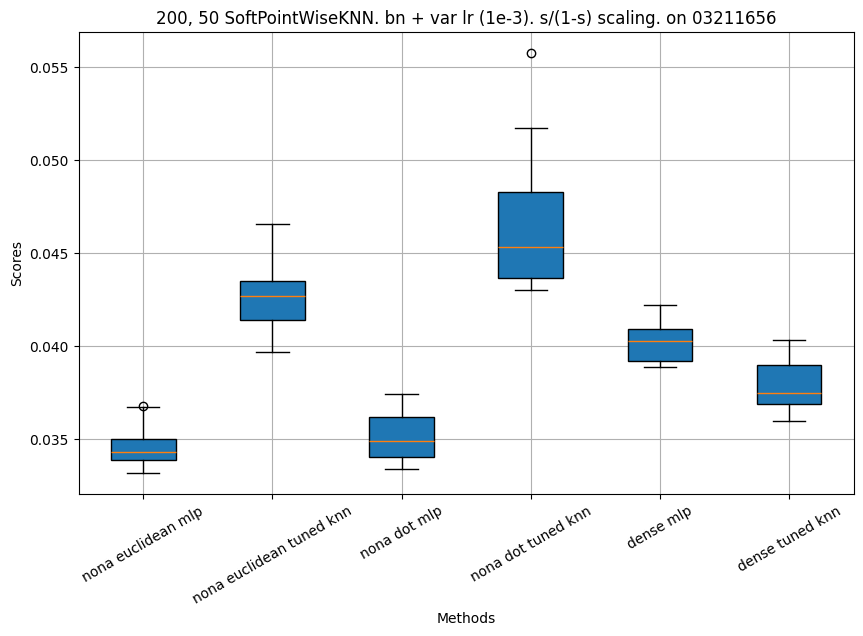

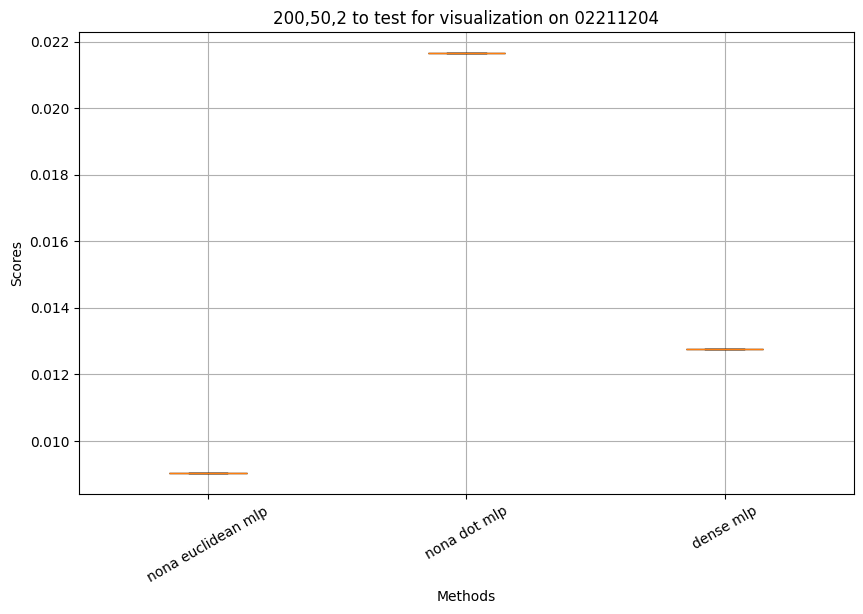

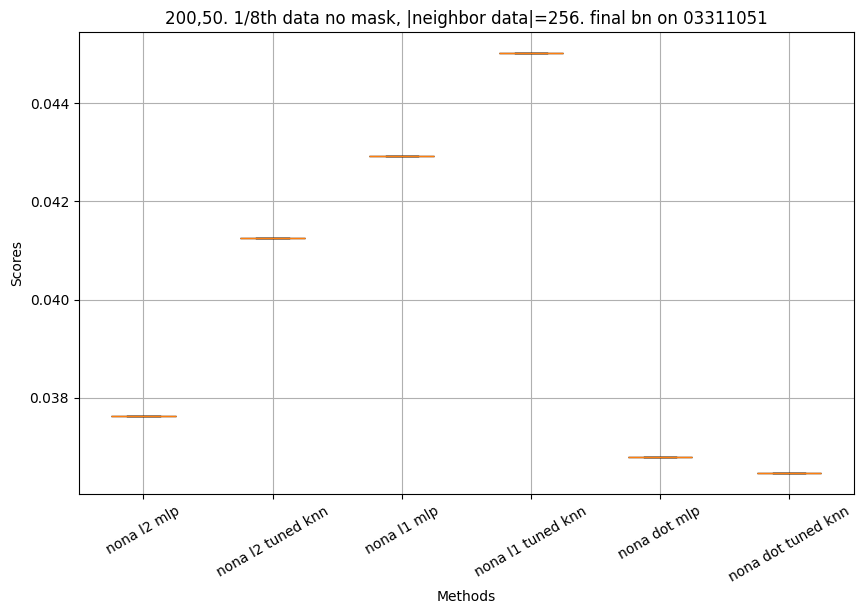

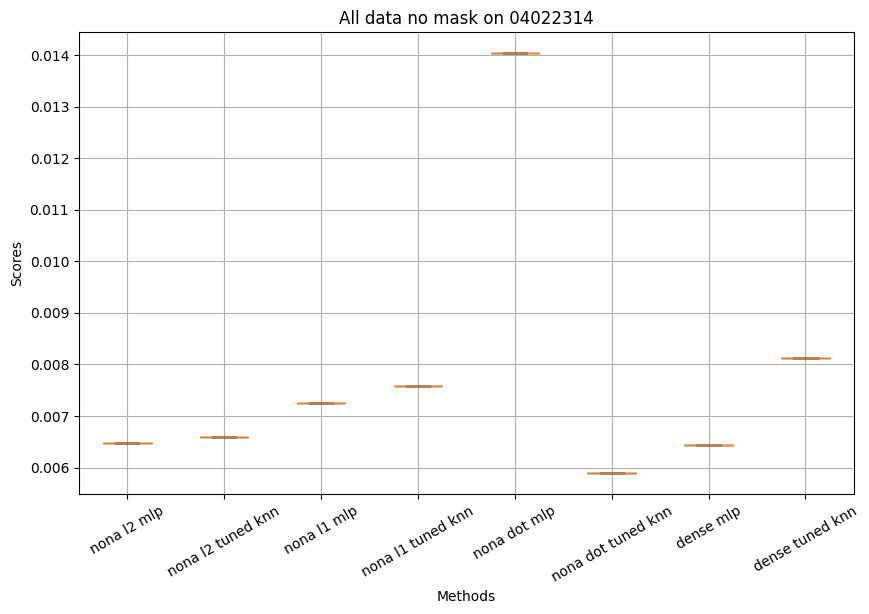

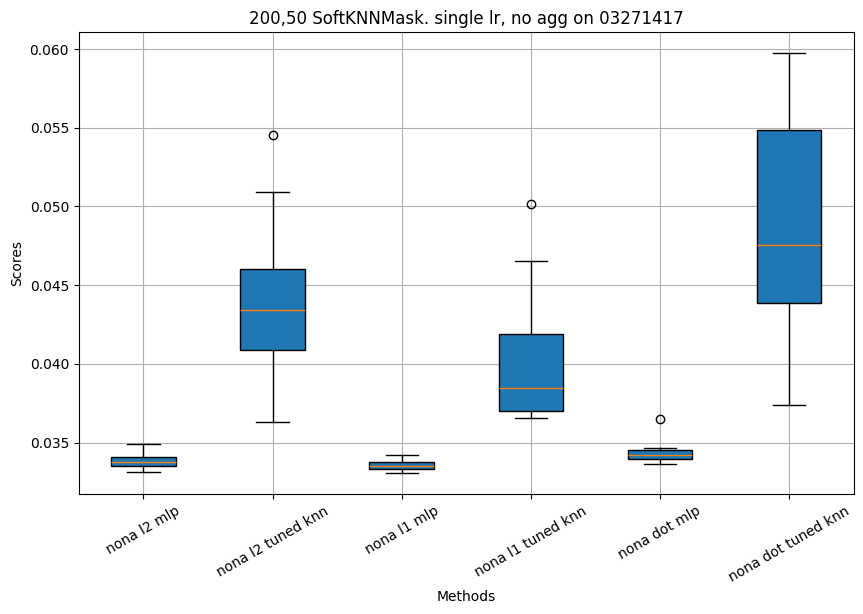

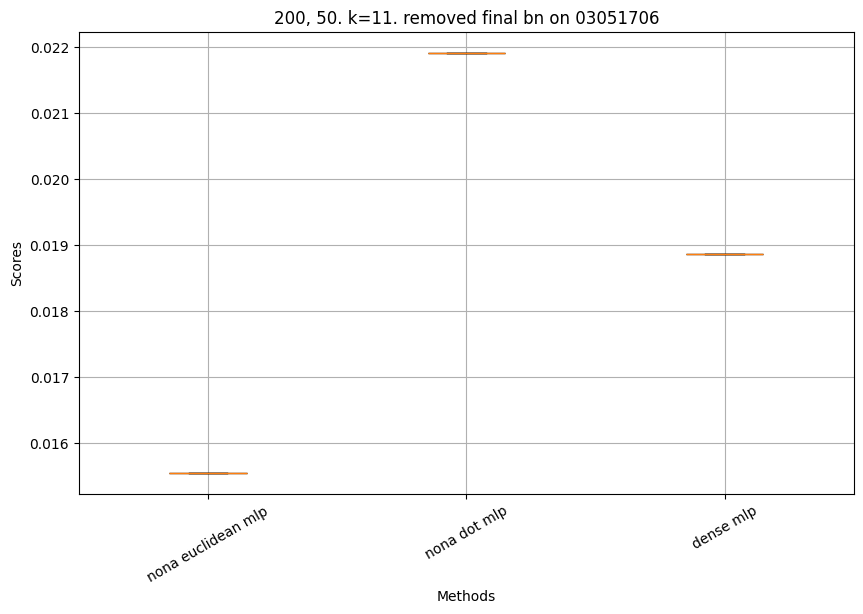

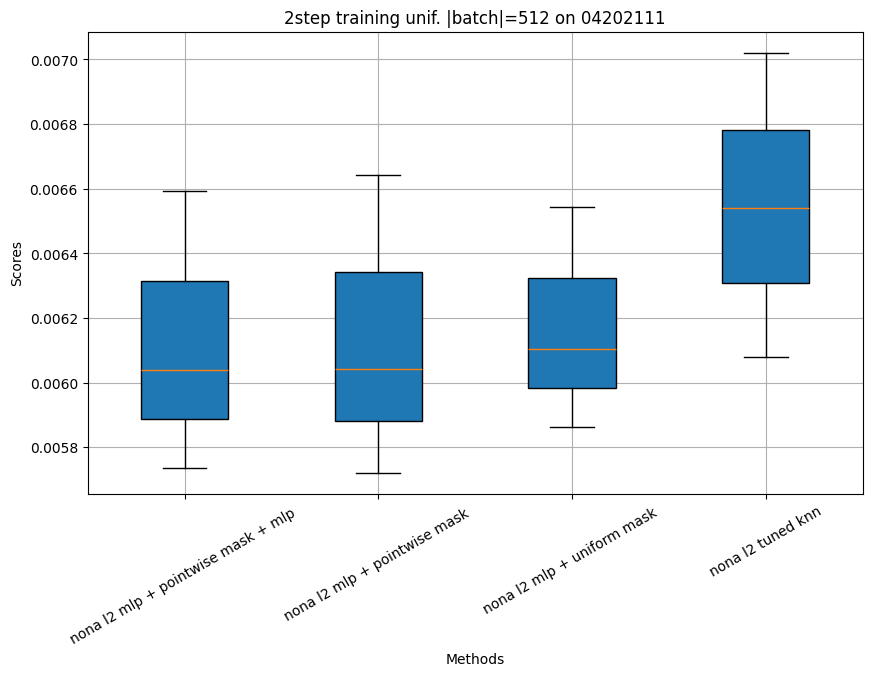

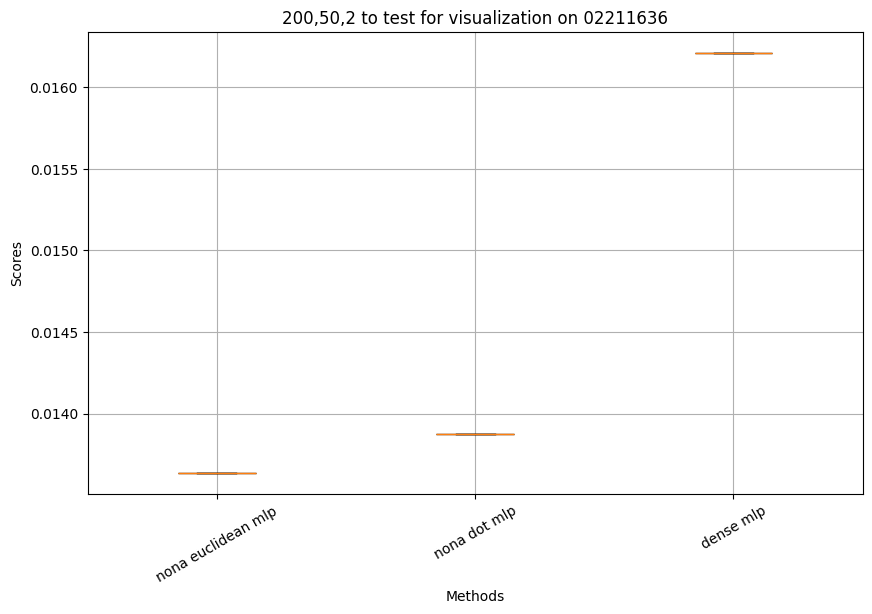

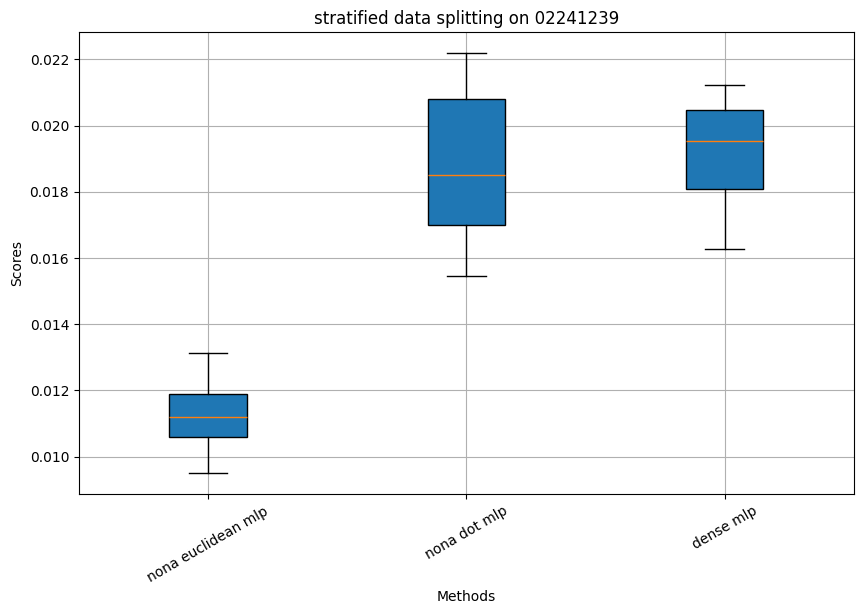

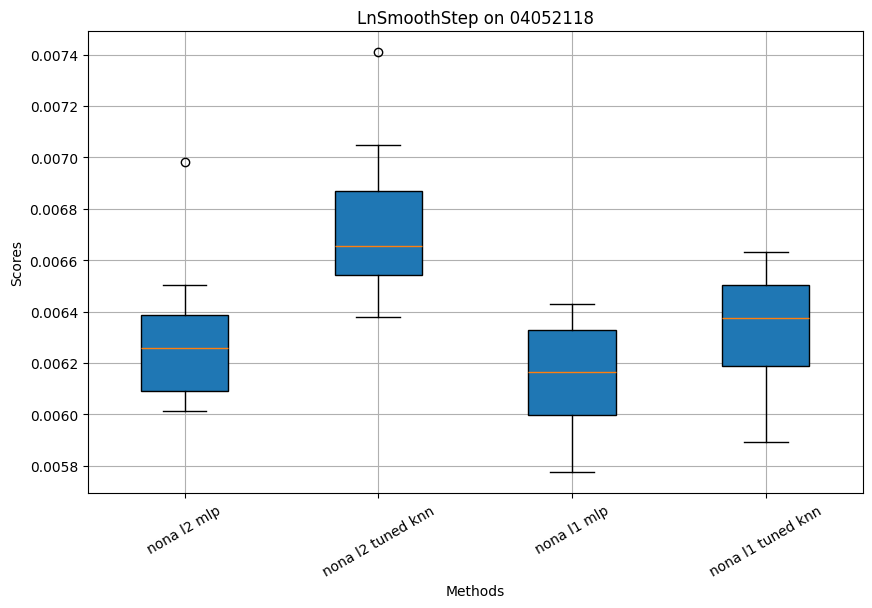

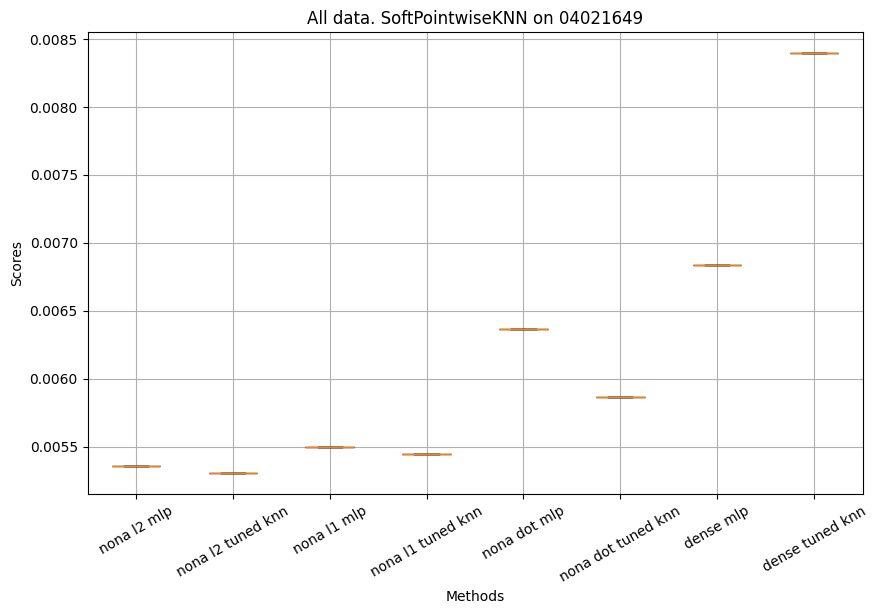

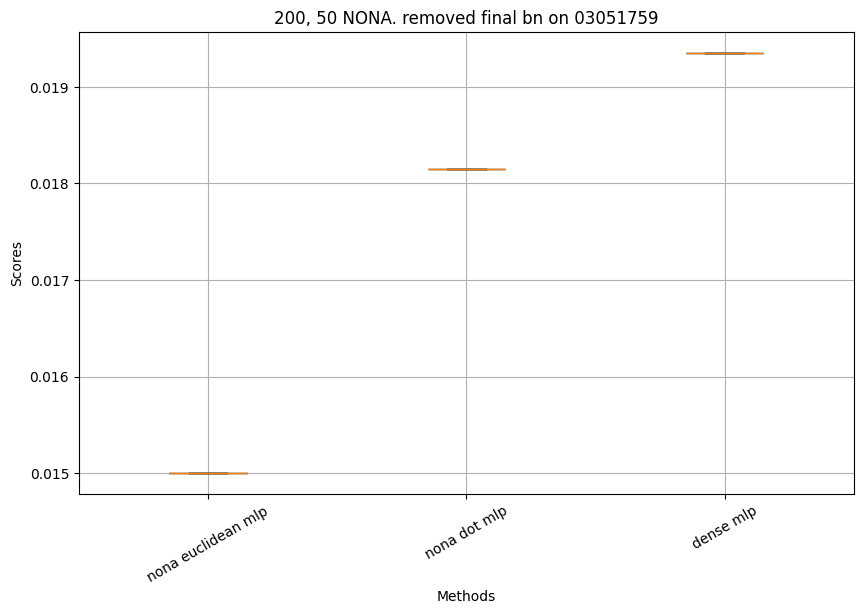

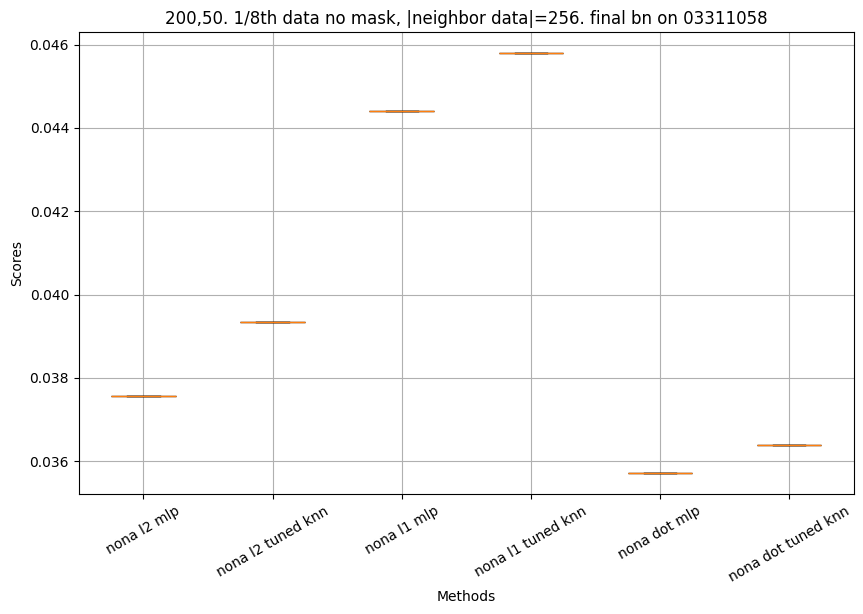

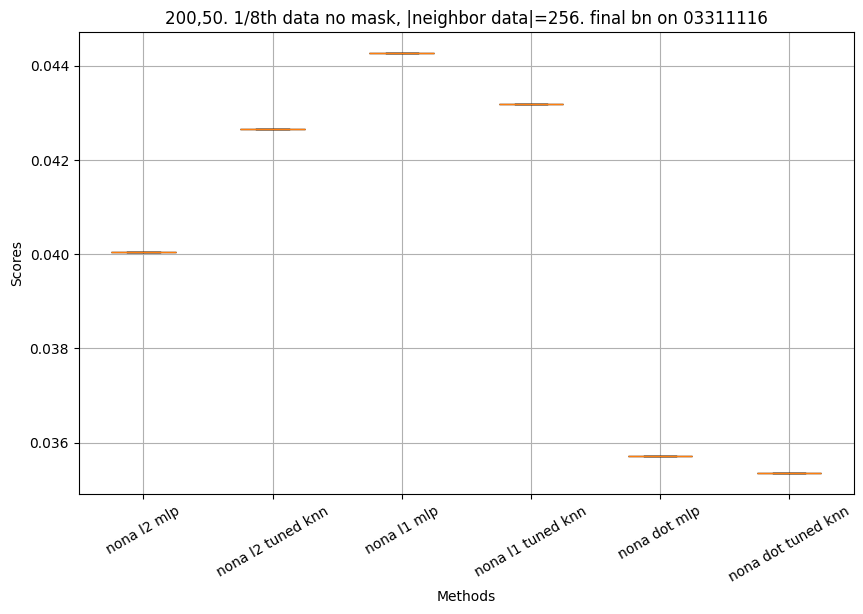

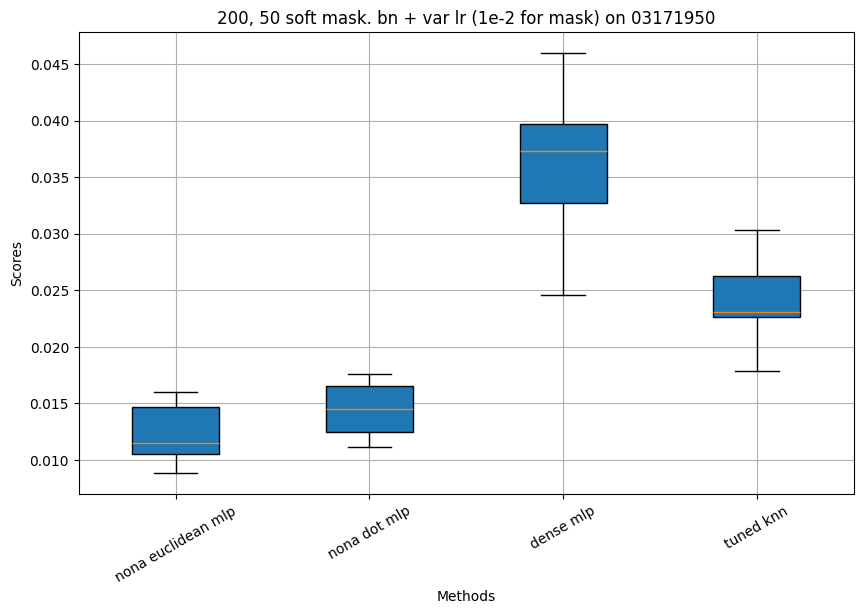

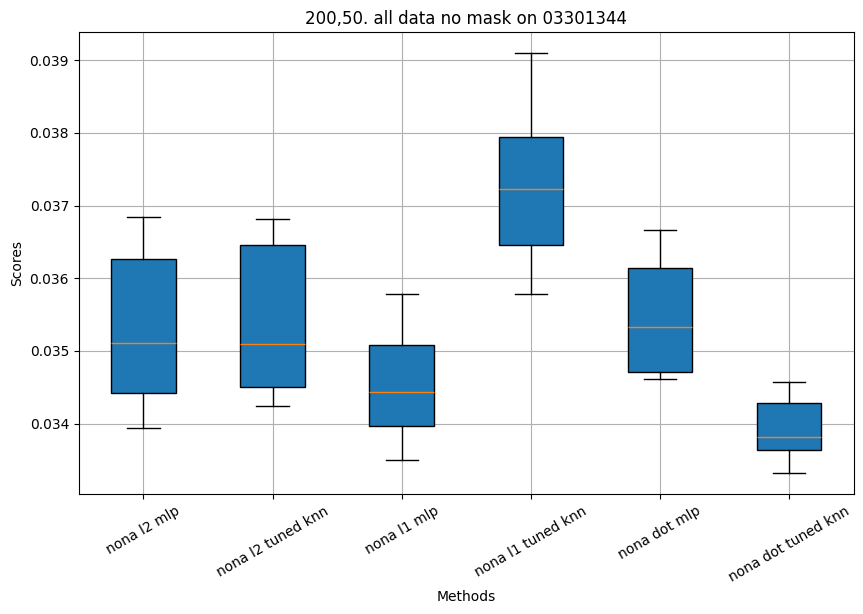

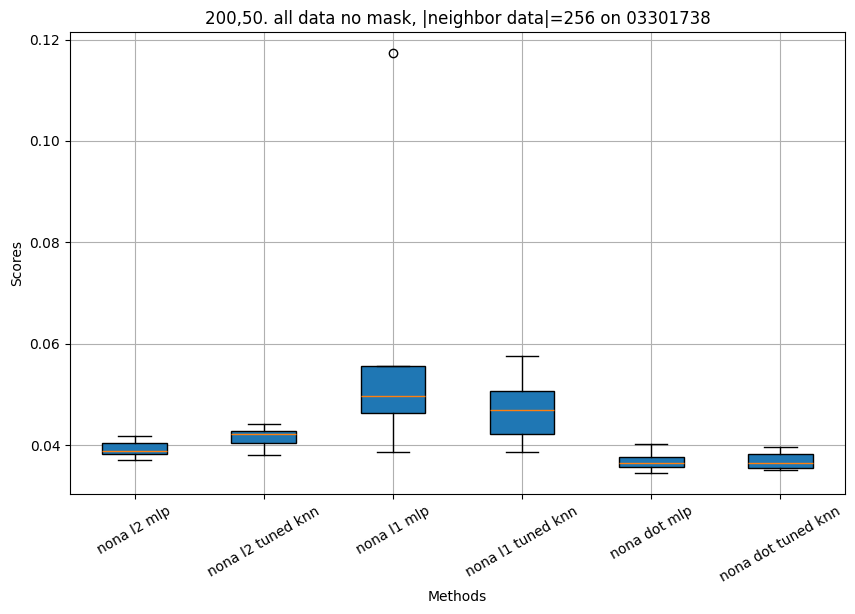

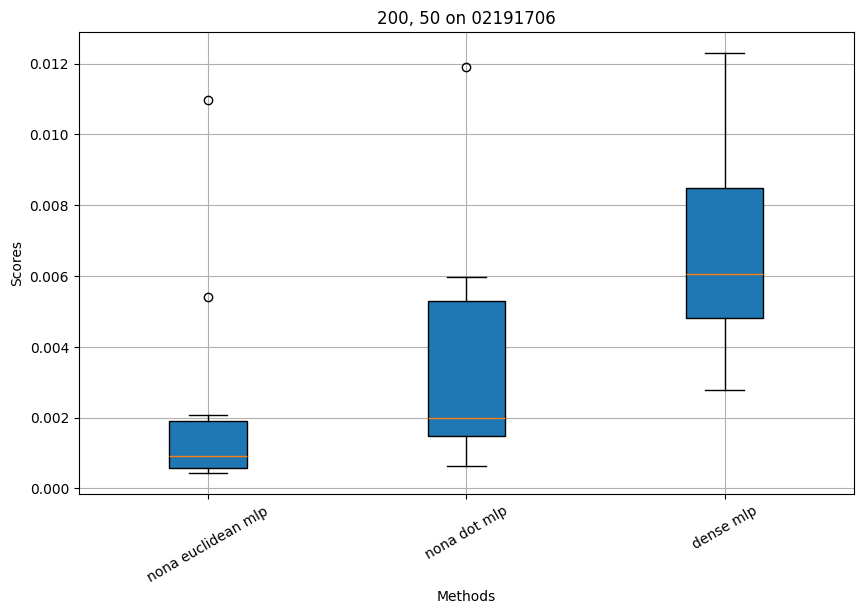

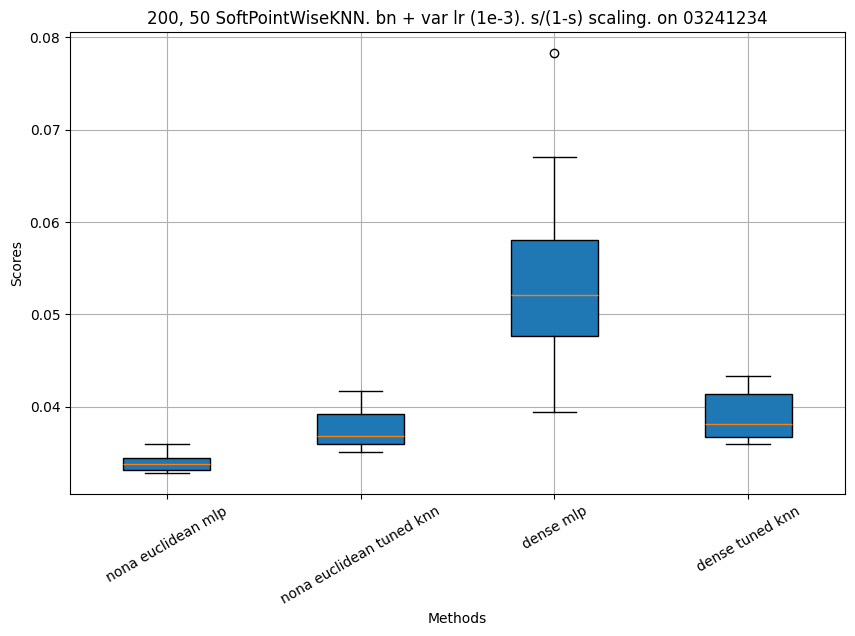

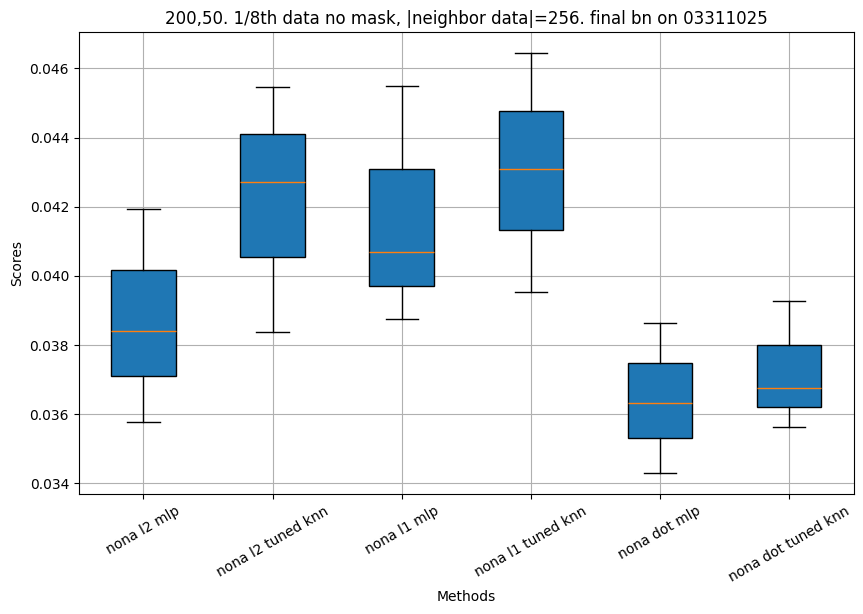

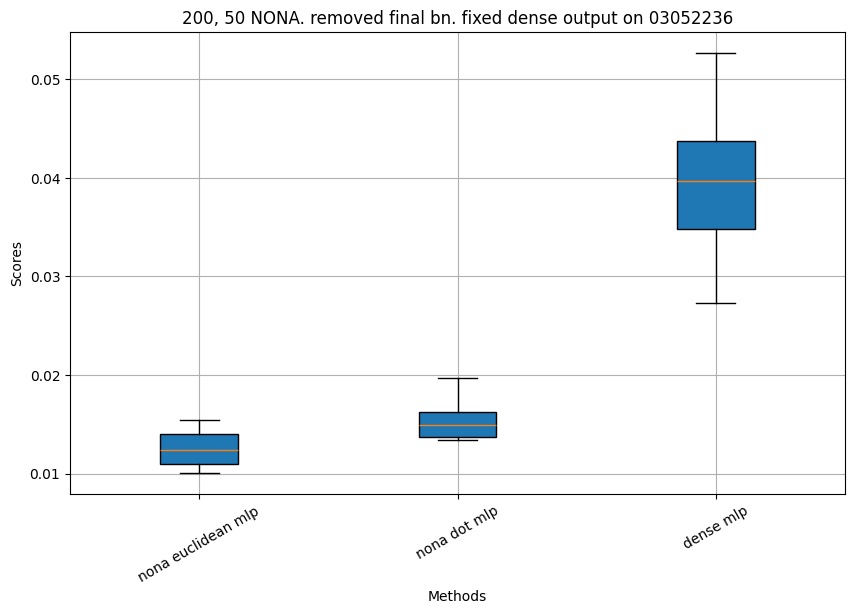

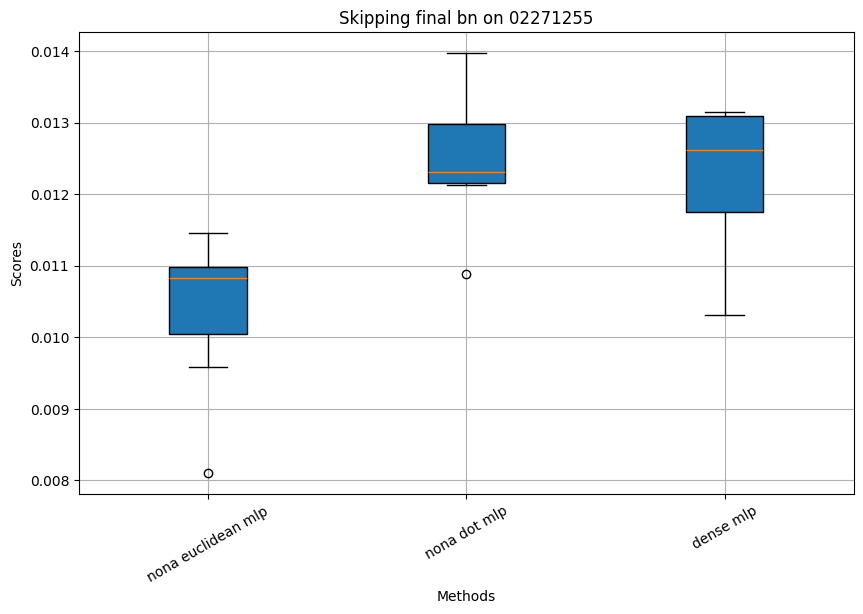

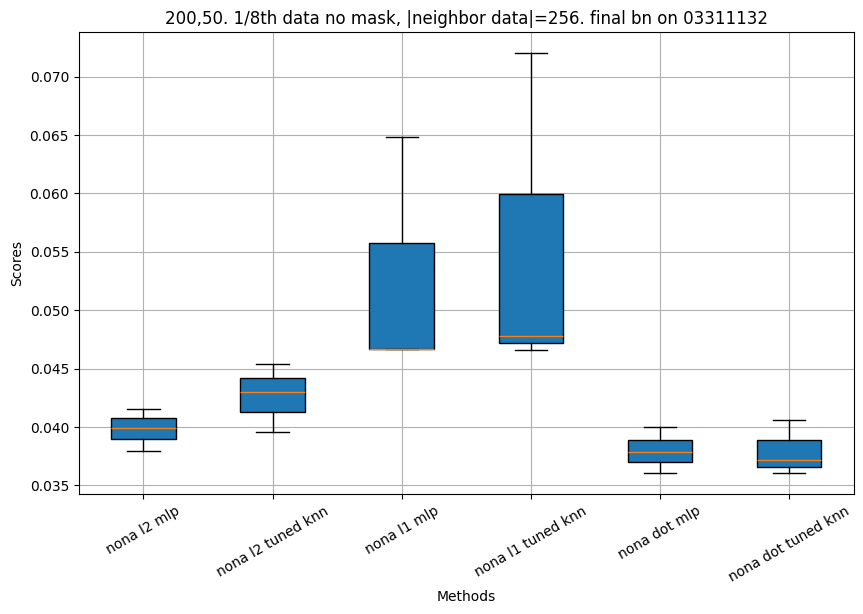

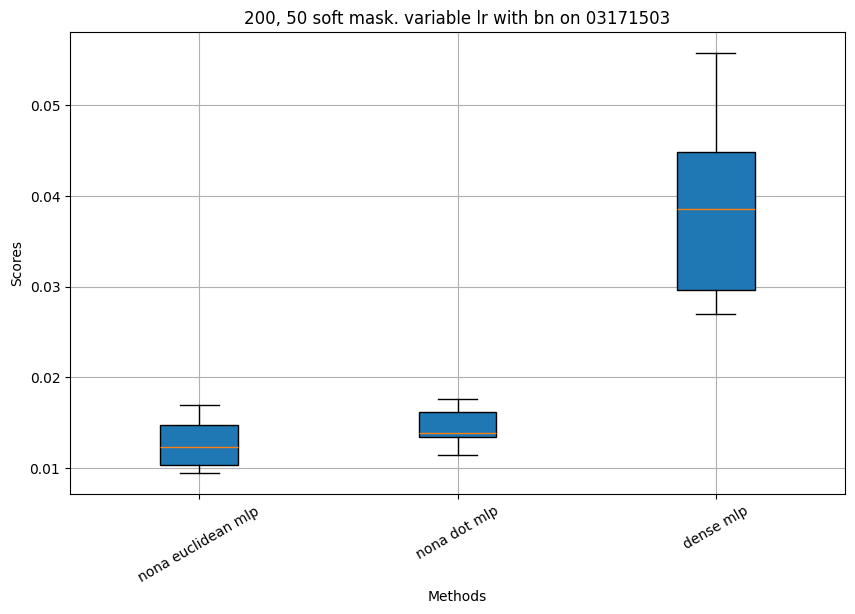

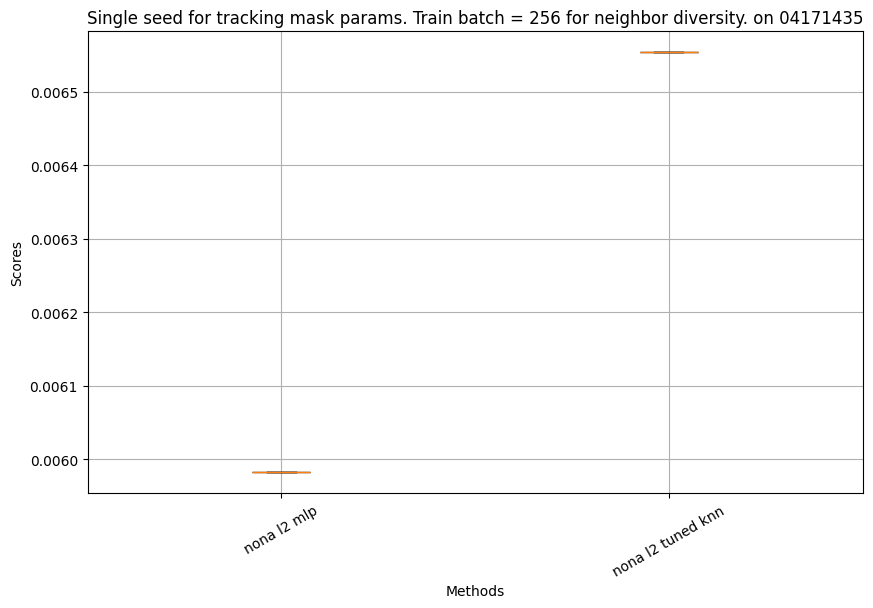

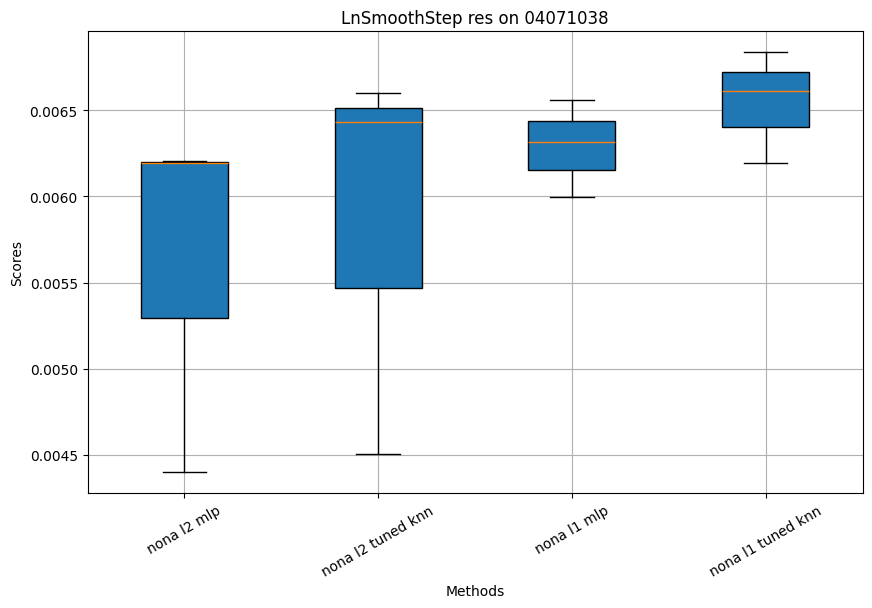

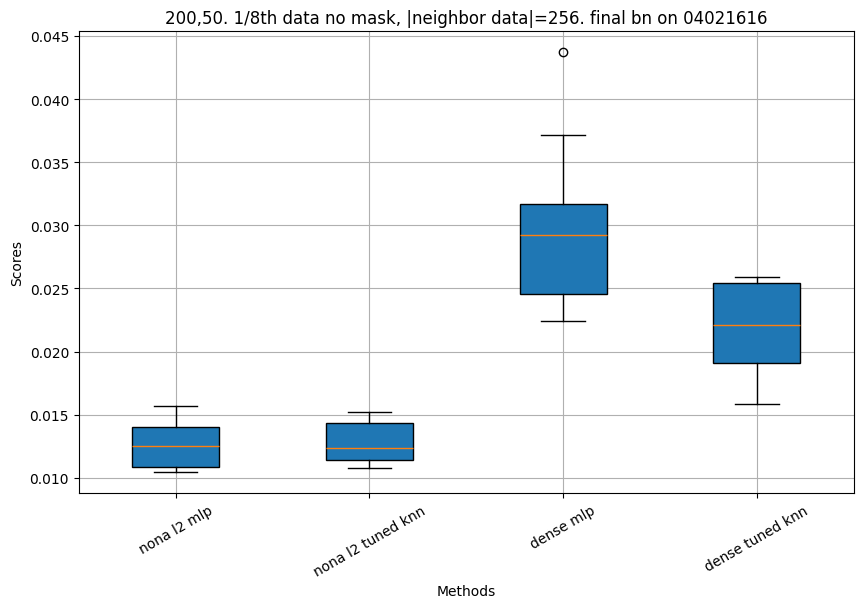

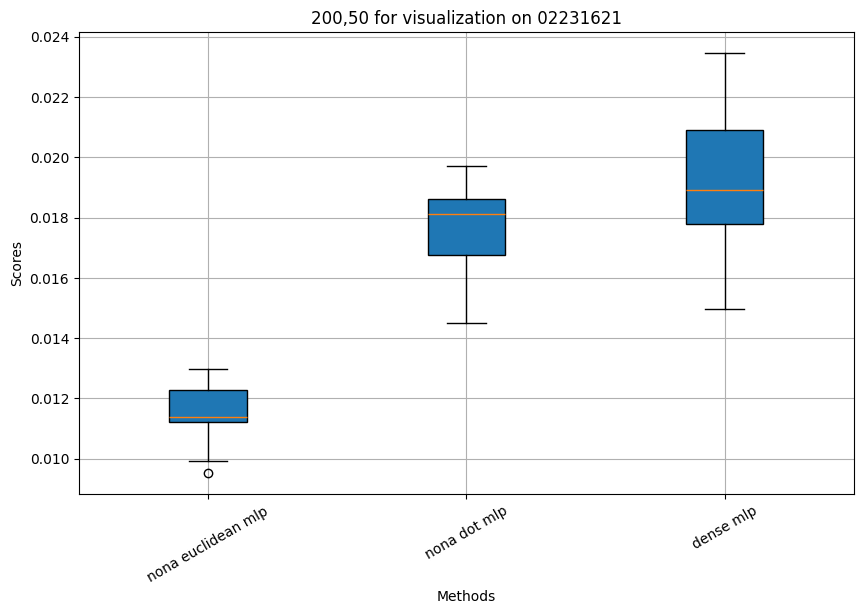

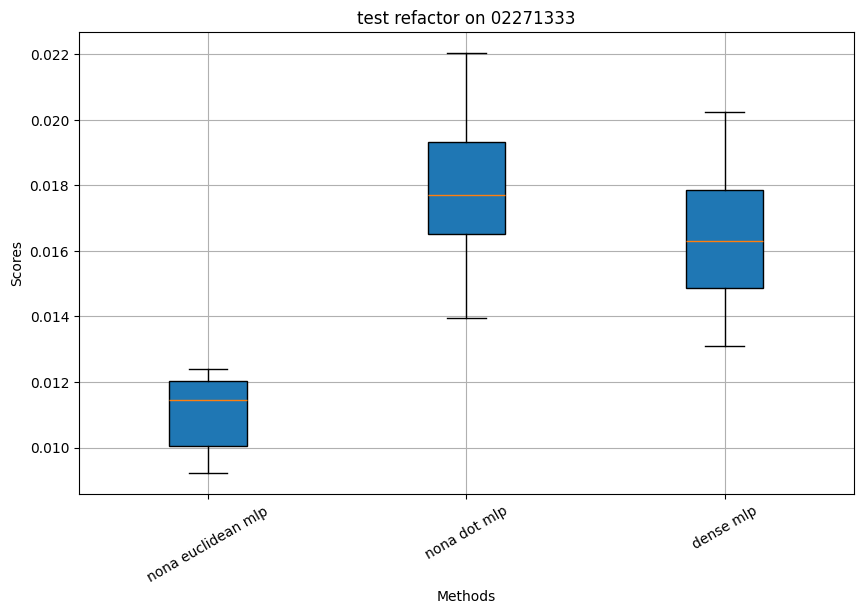

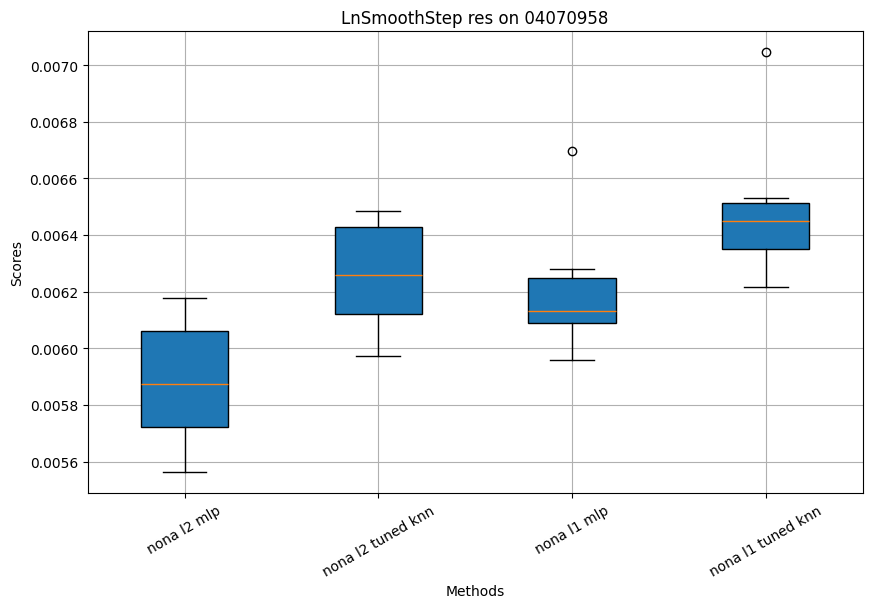

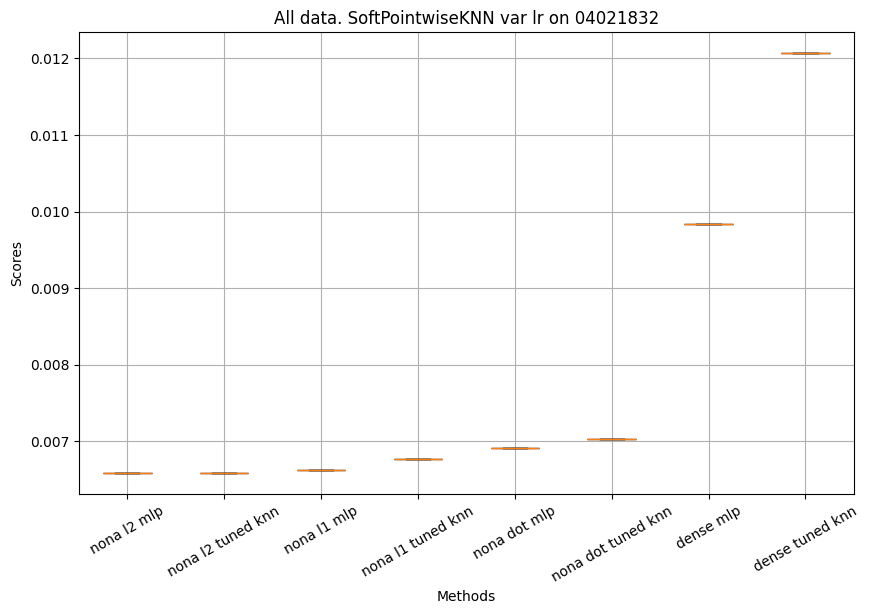

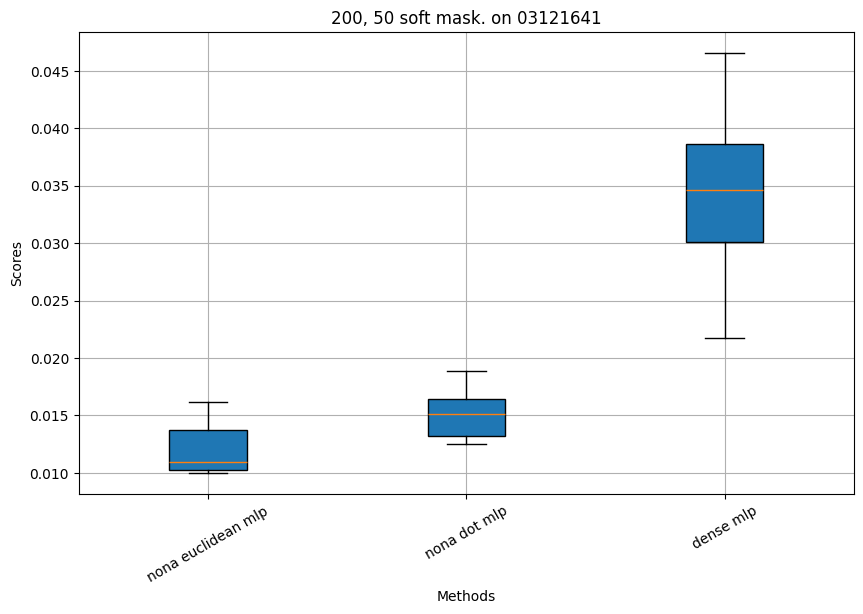

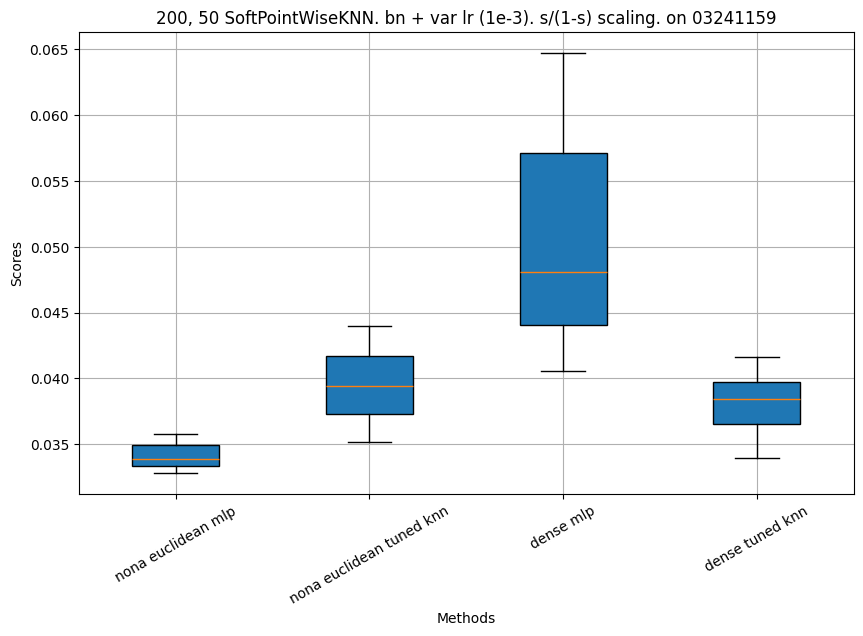

In [22]:
results_dir = "results/rsna"
nona_l2_medians = []
for file_name in os.listdir(results_dir):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(results_dir, file_name)
        date = file_name.split('_')[1]
        date = date.split('.')[0]

        with open(file_path, "rb") as file:
            results = pkl.load(file)
            
            if isinstance(results[0], str):
                desc = results[0]
                scores_list = results[1:]
            else:
                desc = results[-1]
                scores_list = results[:-1]
            
            scores = {
                method: [abs(scores[method][0]) for scores in scores_list]
                for method in scores_list[0]
            }
            
            df = pd.DataFrame(scores)
            if 'nona l2 mlp' in df.columns:
                median_nona_l2 = df['nona l2 mlp'].median()
                nona_l2_medians.append([median_nona_l2, date])
            if 'nona euclidean mlp' in df.columns:
                median_nona_l2 = df['nona euclidean mlp'].median()
                nona_l2_medians.append([median_nona_l2, date])

            plt.figure(figsize=(10, 6))
            plt.boxplot(df.values, tick_labels=df.columns, vert=True, patch_artist=True)
            plt.xticks(rotation=30)
            plt.title(f'{desc} on {date}')
            plt.xlabel("Methods")
            plt.ylabel("Scores")
            plt.grid(True)
            plt.show(block=True)

In [23]:
sorted(nona_l2_medians, key = lambda x: x[0])

[[np.float64(0.0009223496308550239), '02191706'],
 [np.float64(0.0009948013175744563), '02211525'],
 [np.float64(0.0022085686214268208), '02192020'],
 [np.float64(0.005356103181838989), '04021649'],
 [np.float64(0.00587332621216774), '04070958'],
 [np.float64(0.005944960750639439), '04071536'],
 [np.float64(0.005981847643852234), '04171435'],
 [np.float64(0.006193423178046942), '04071038'],
 [np.float64(0.0062564960680902), '04052118'],
 [np.float64(0.006472618784755468), '04022314'],
 [np.float64(0.006587854586541653), '04021832'],
 [np.float64(0.009031702764332294), '02211204'],
 [np.float64(0.010669032577425241), '03131129'],
 [np.float64(0.010832378640770912), '02271255'],
 [np.float64(0.010955289006233215), '03121641'],
 [np.float64(0.01119833579286933), '02241239'],
 [np.float64(0.011391878593713045), '02231621'],
 [np.float64(0.011444648262113333), '02271333'],
 [np.float64(0.011470898985862732), '03171950'],
 [np.float64(0.01226378558203578), '03171503'],
 [np.float64(0.0123680

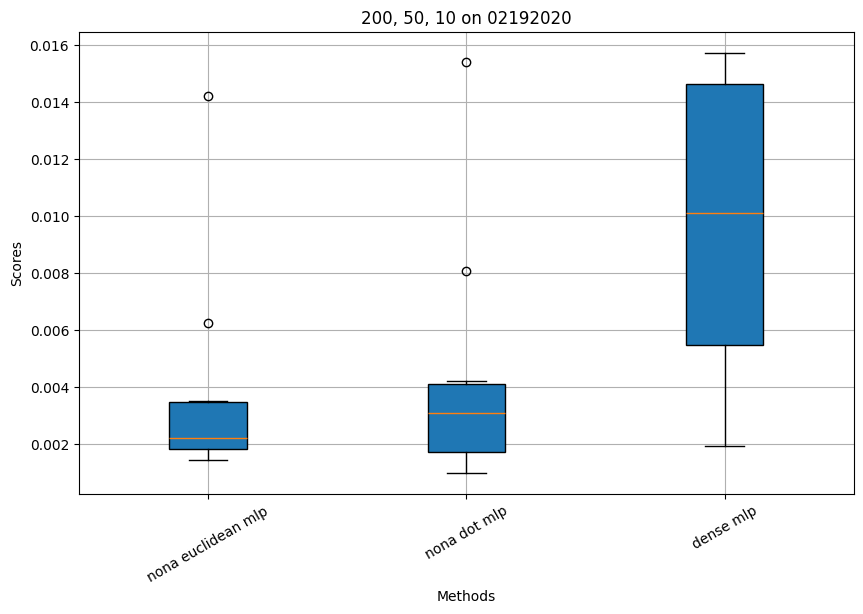

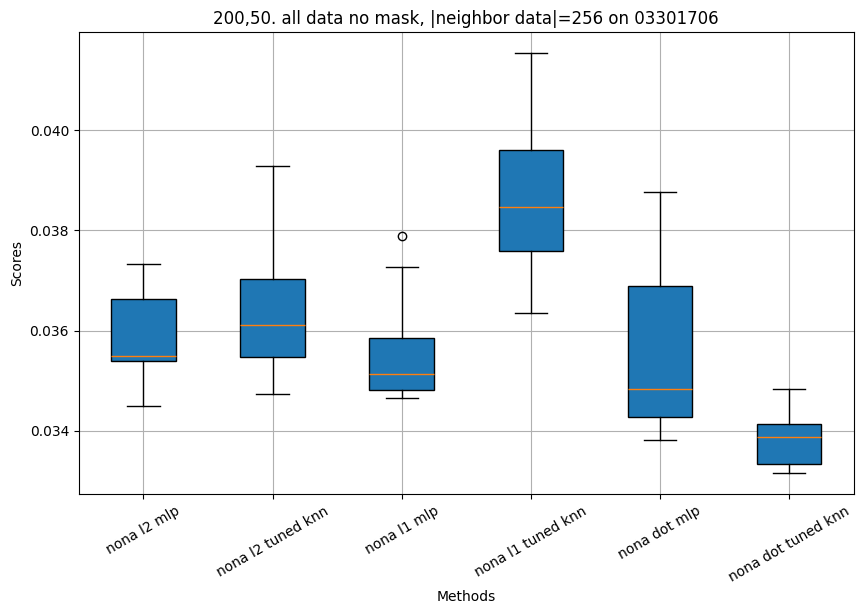

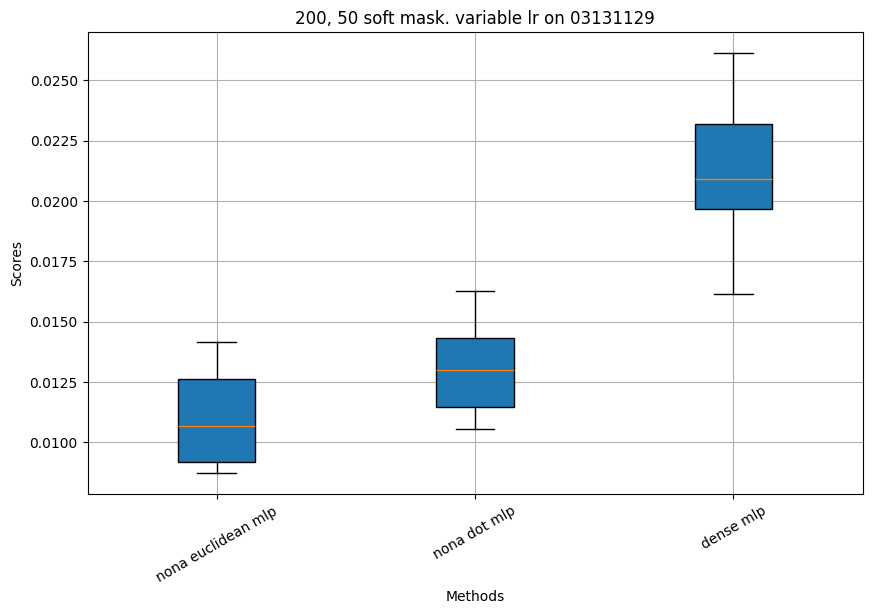

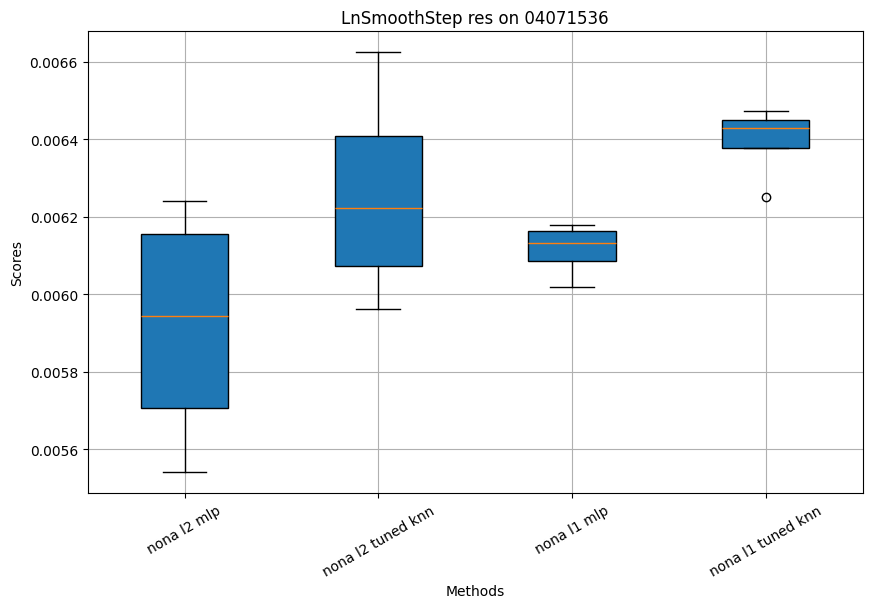

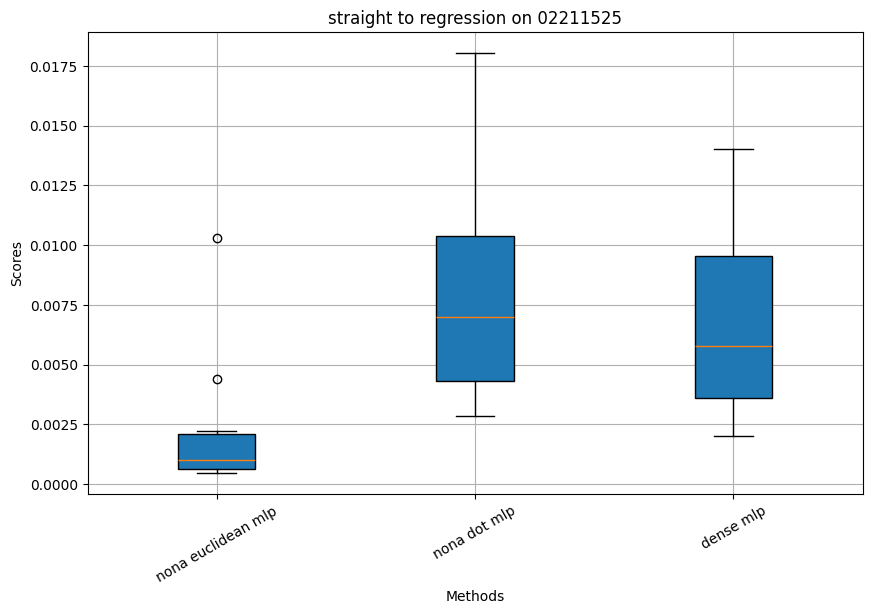

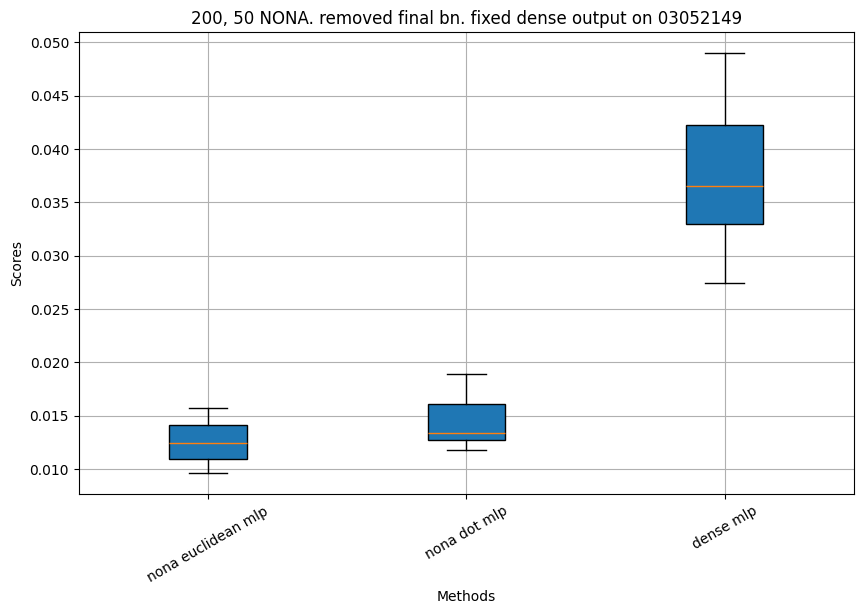

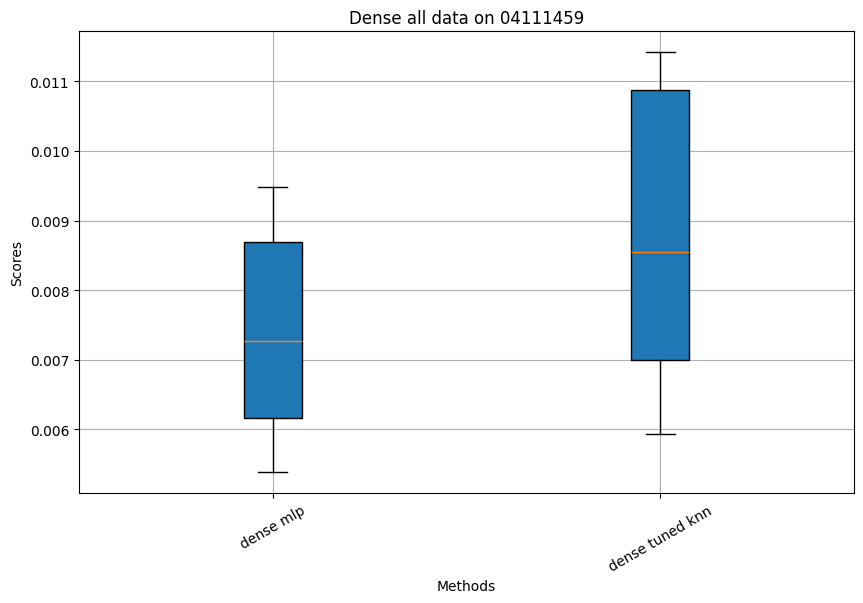

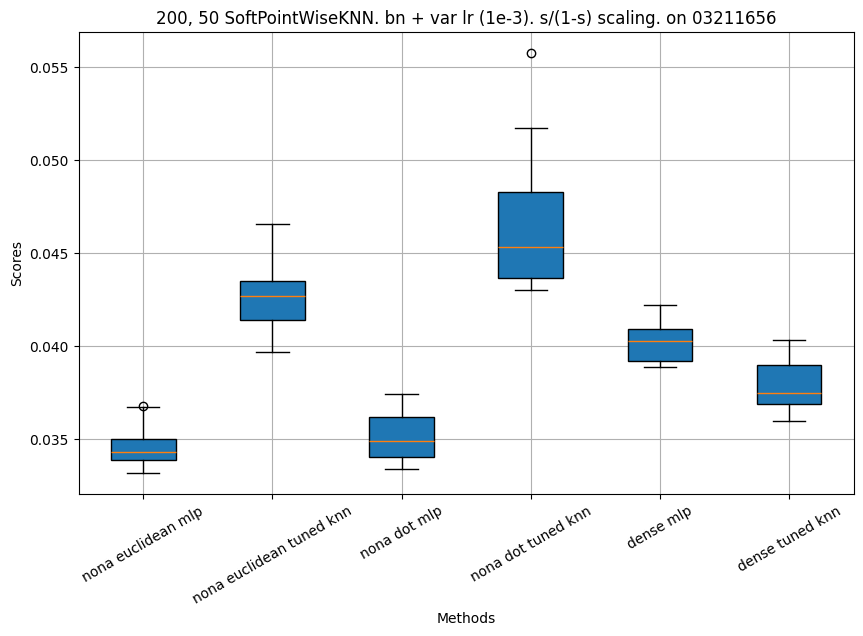

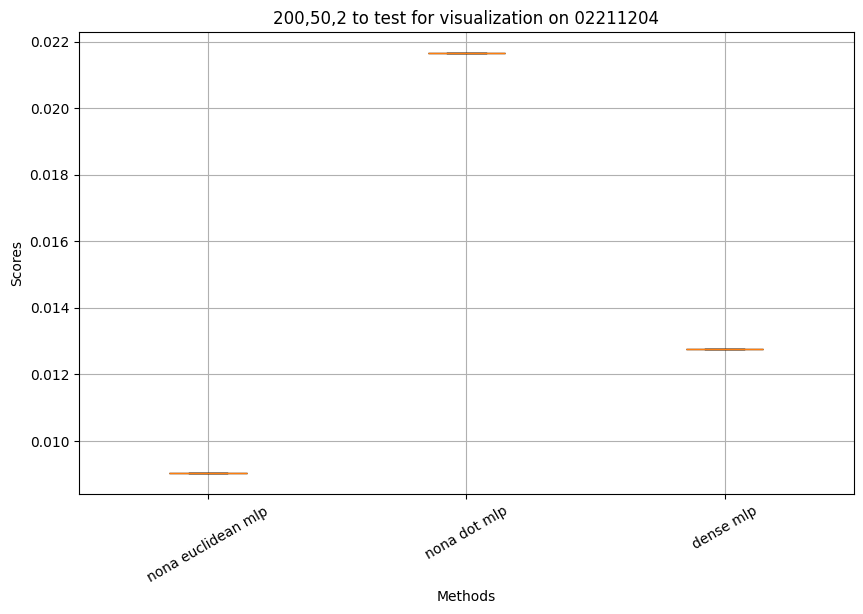

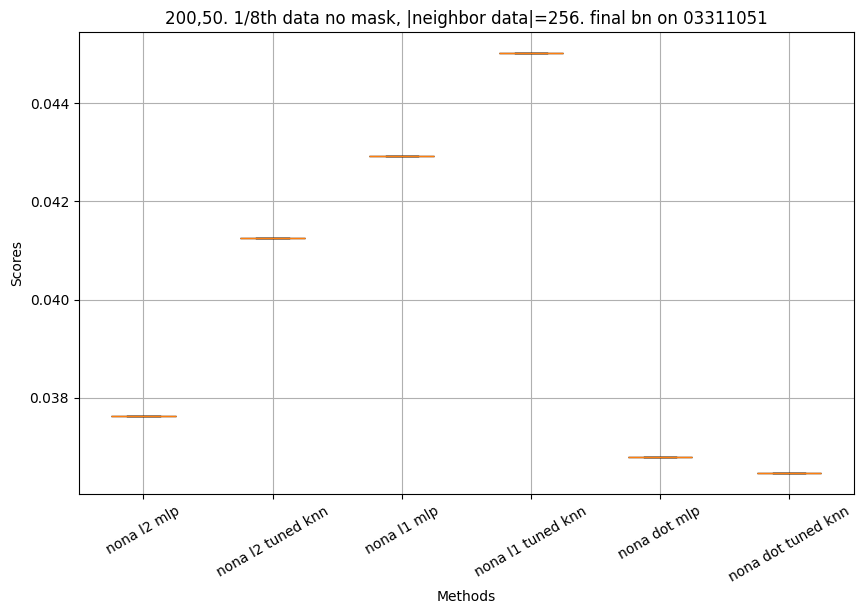

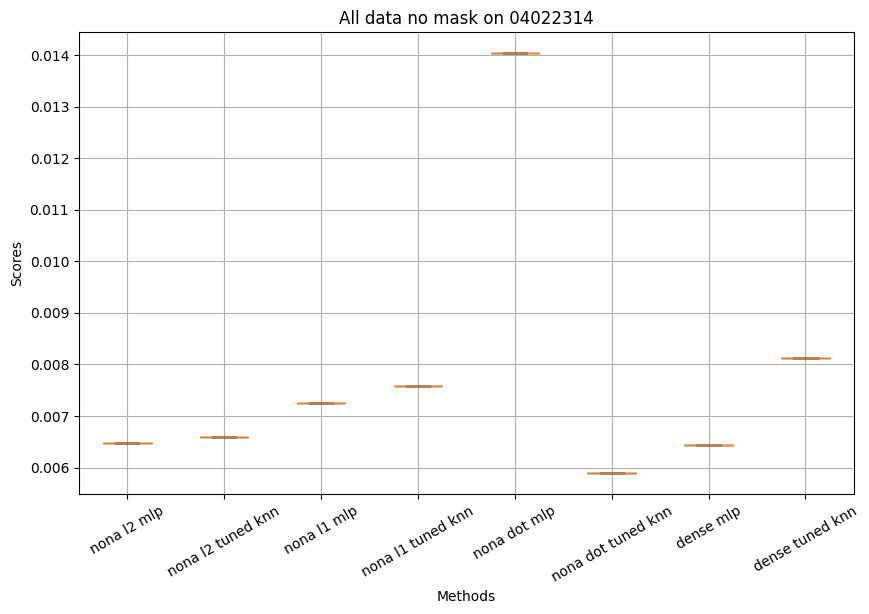

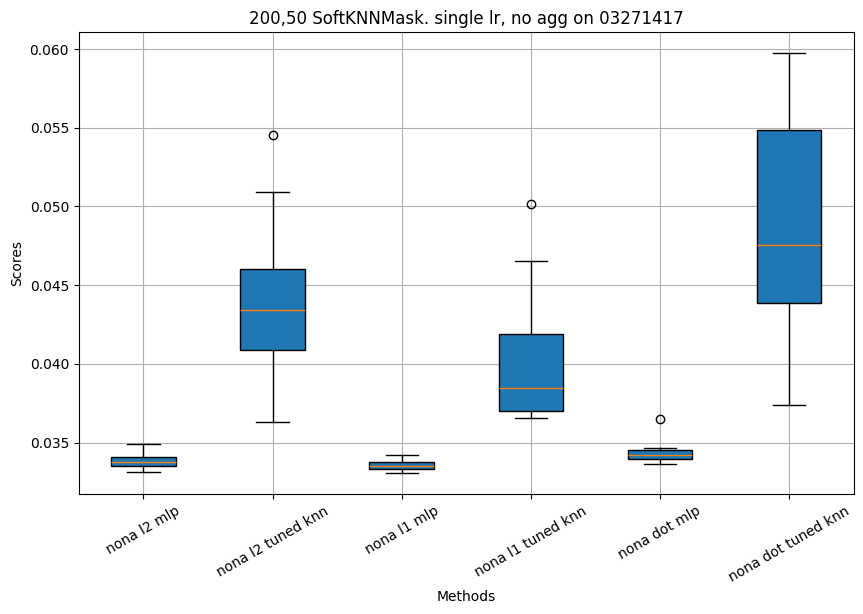

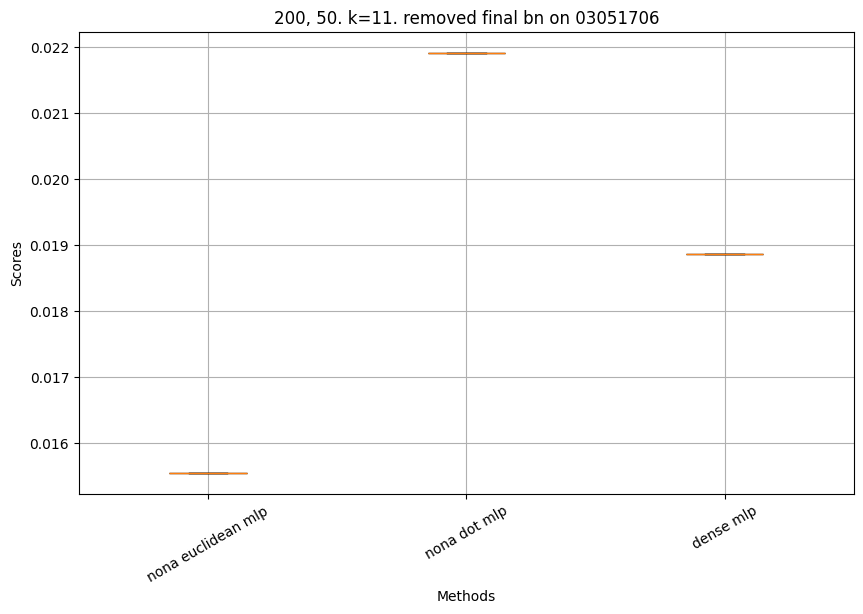

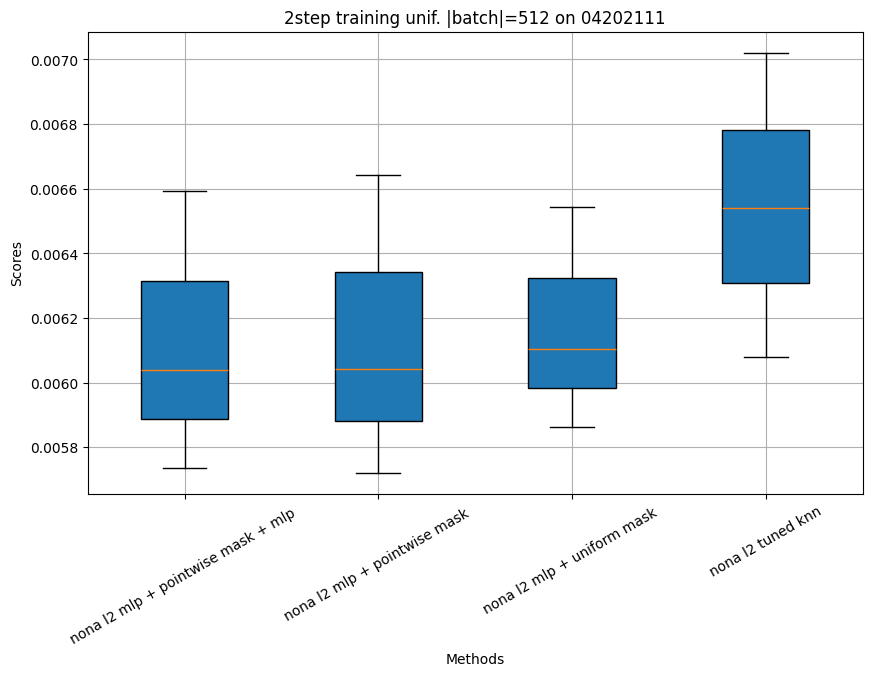

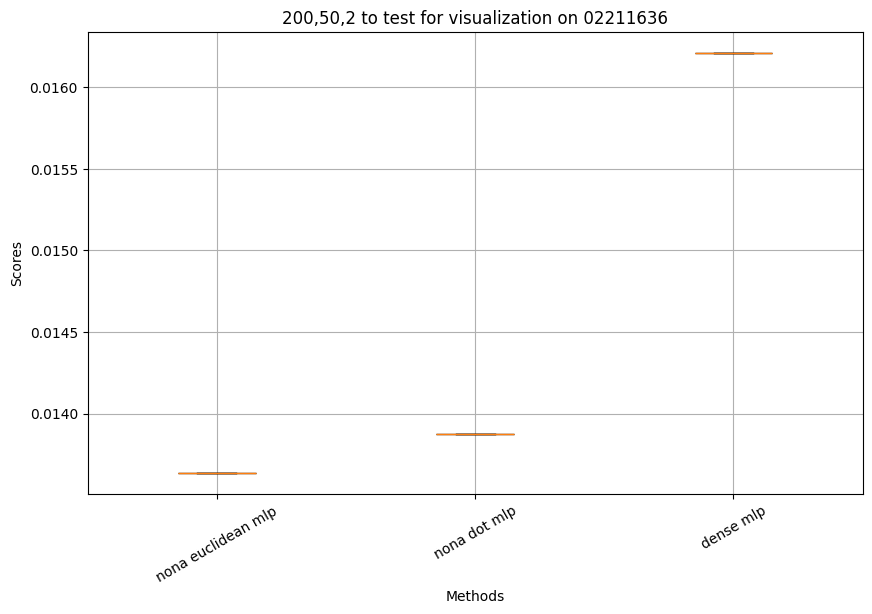

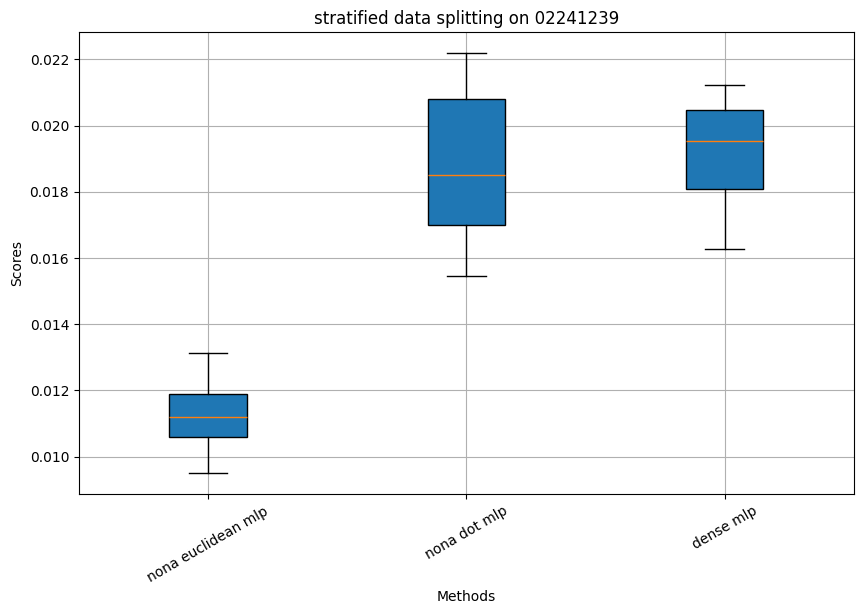

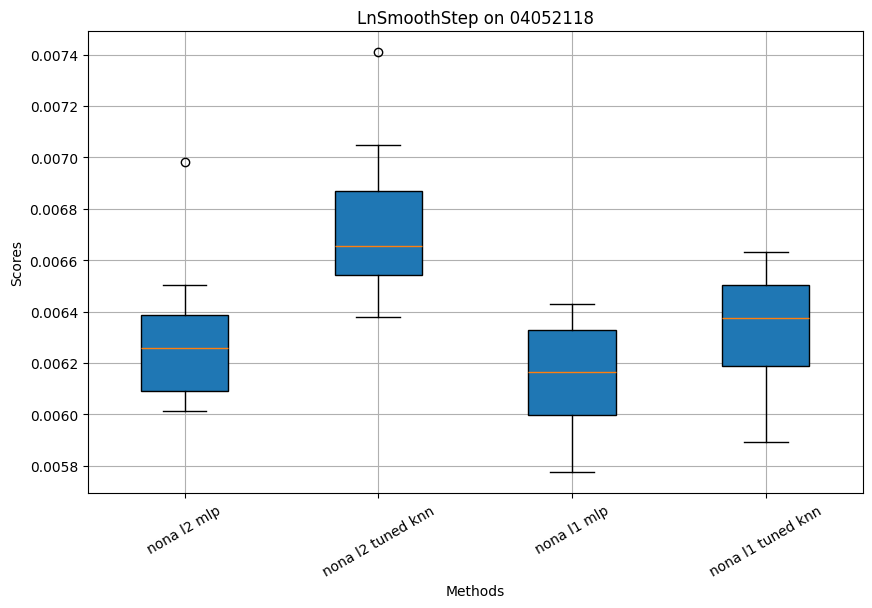

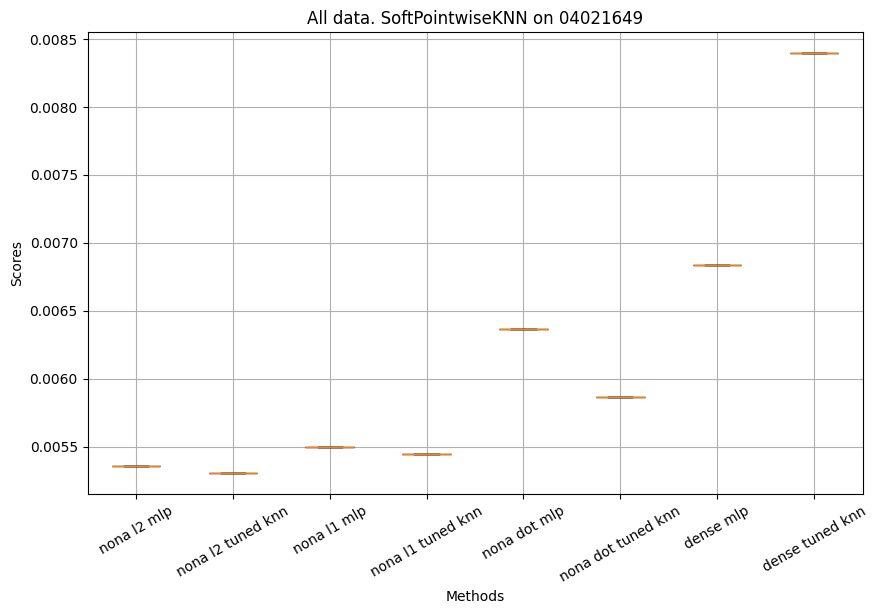

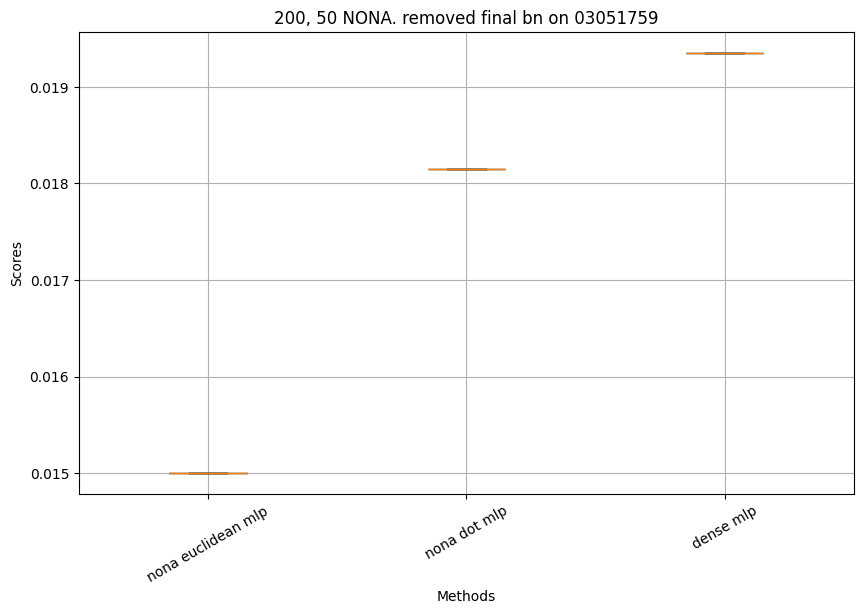

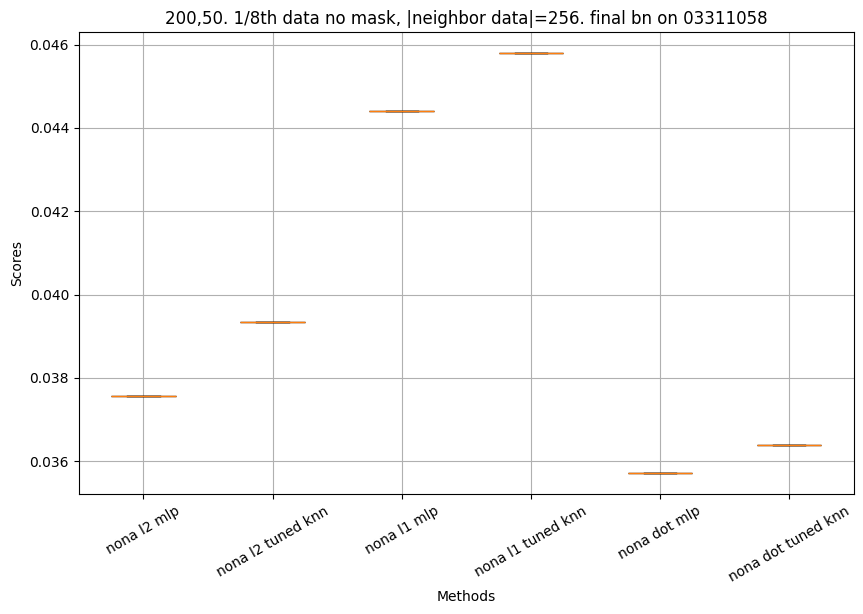

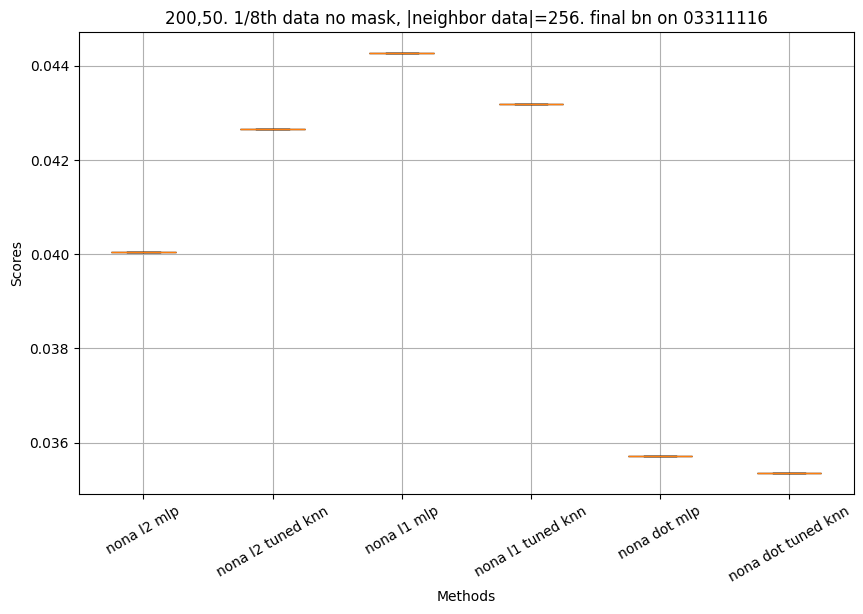

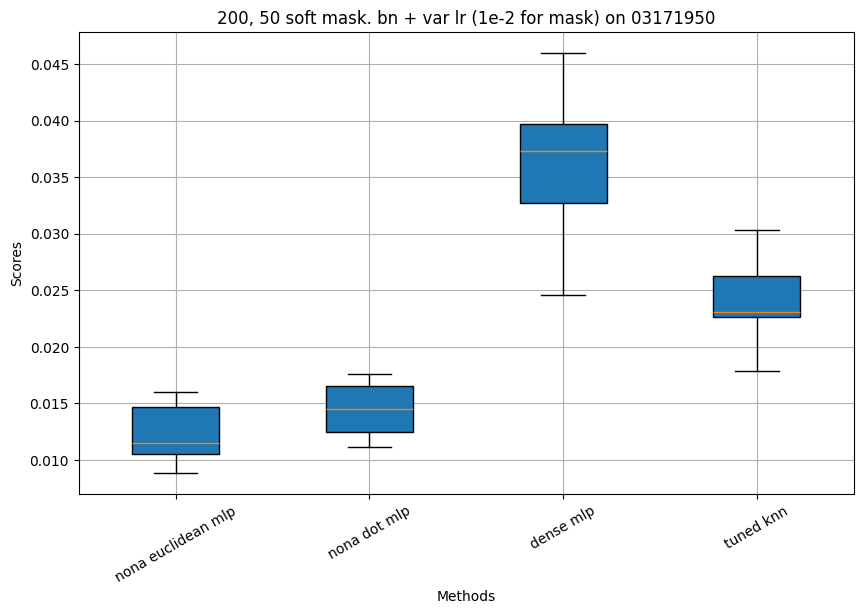

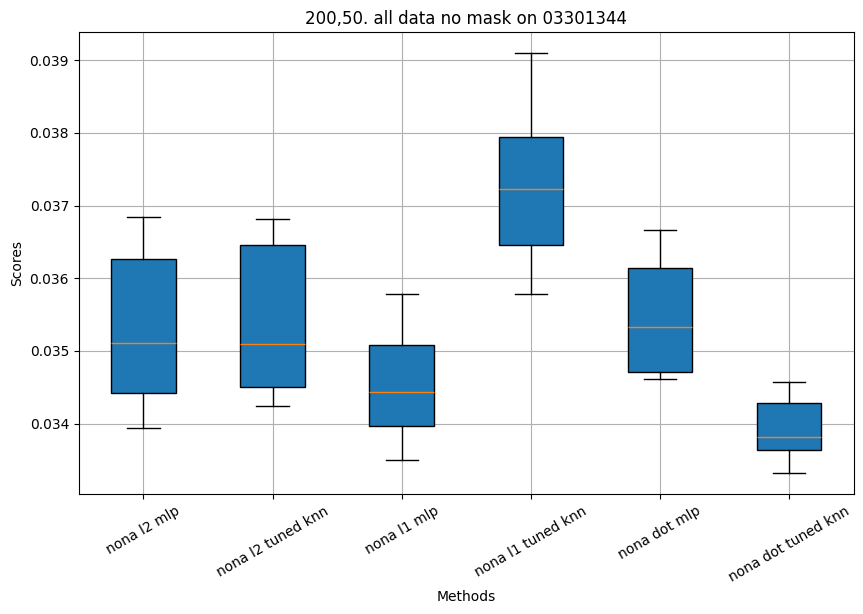

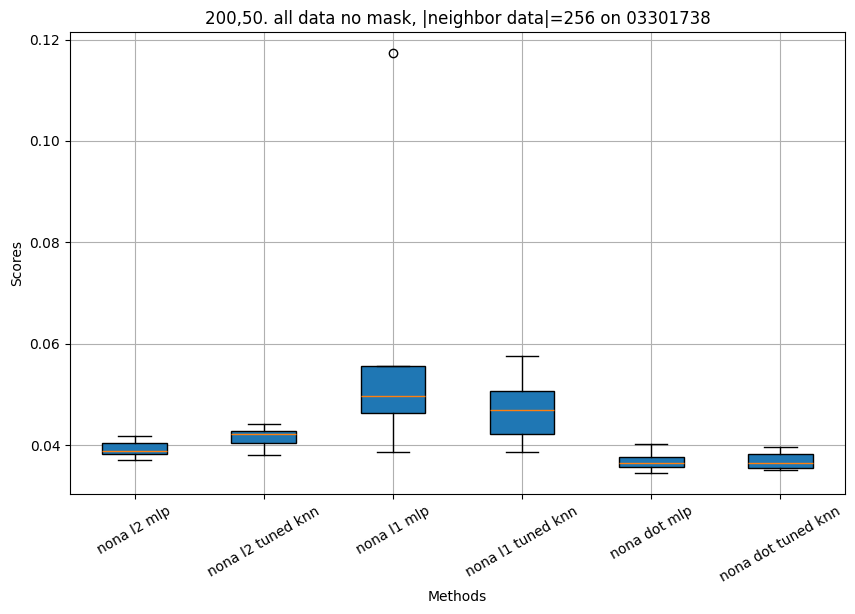

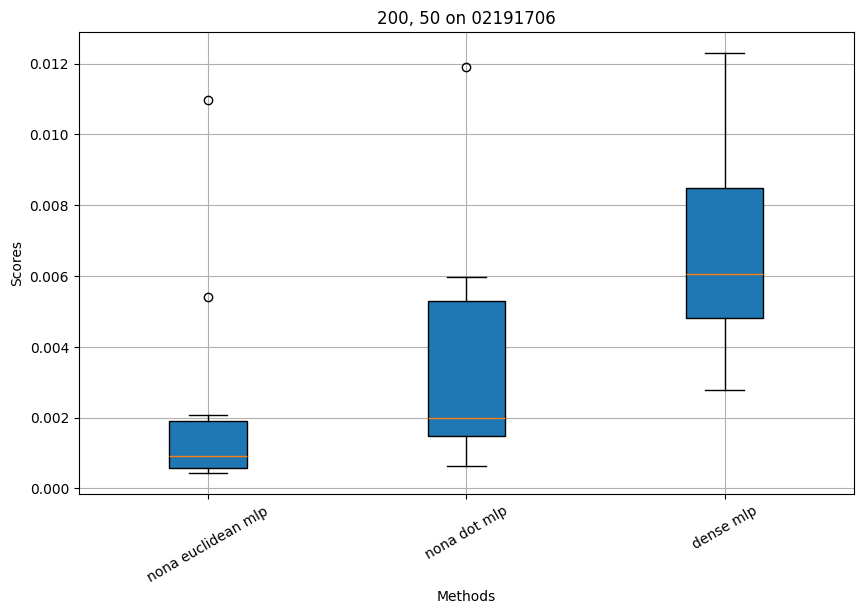

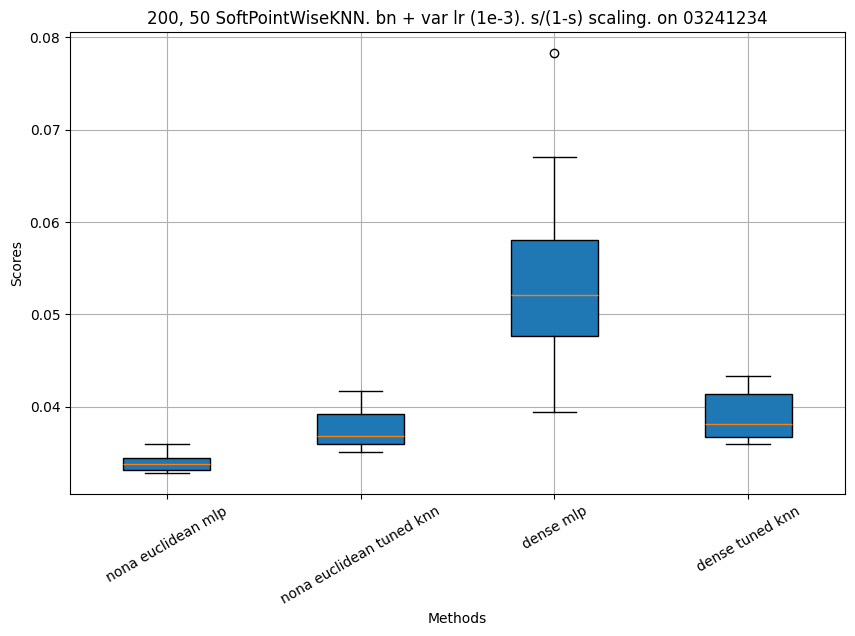

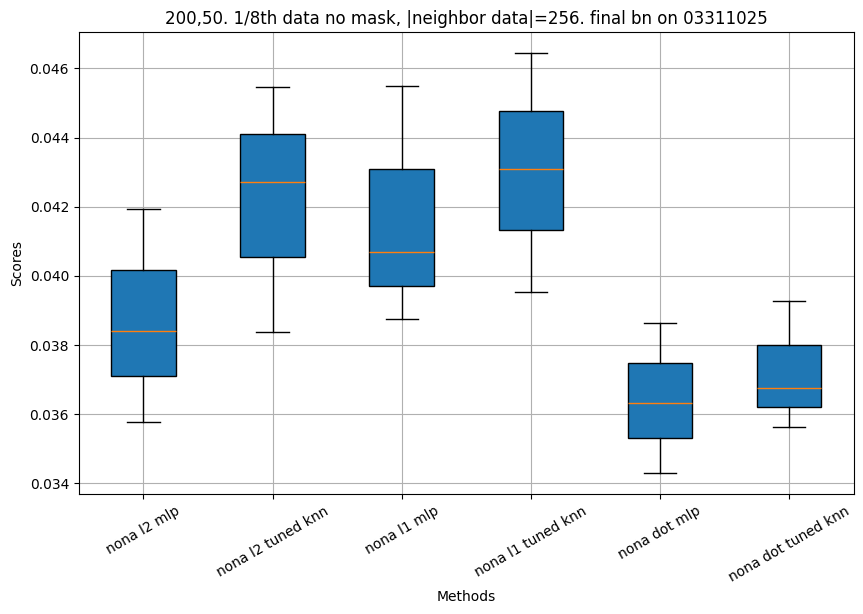

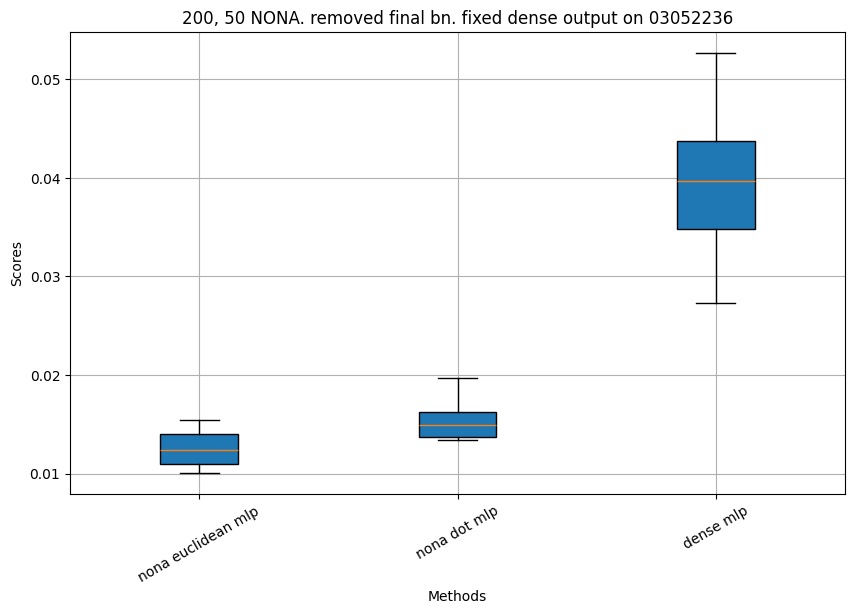

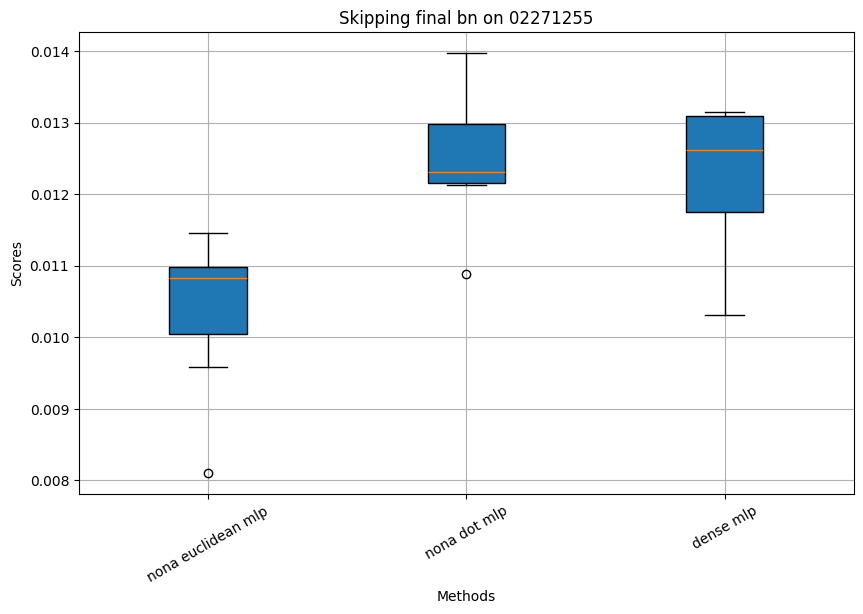

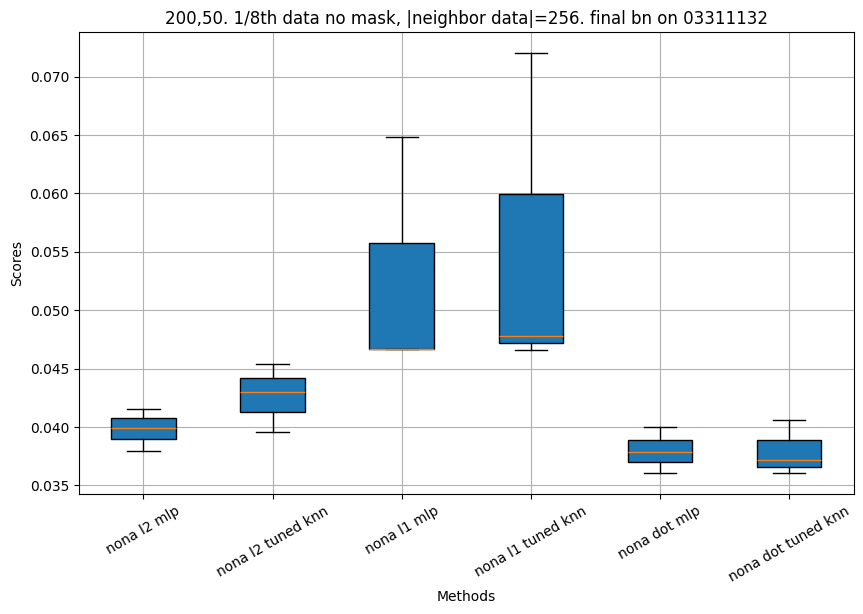

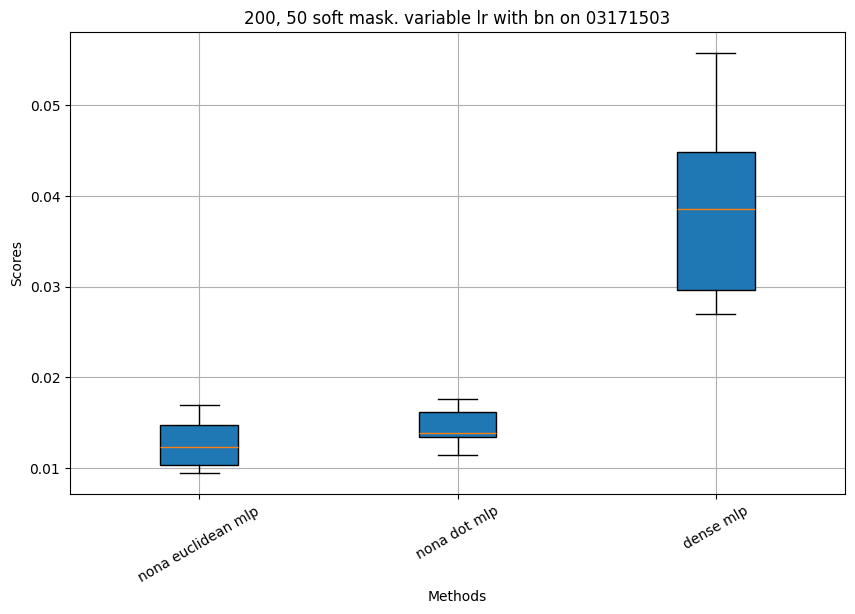

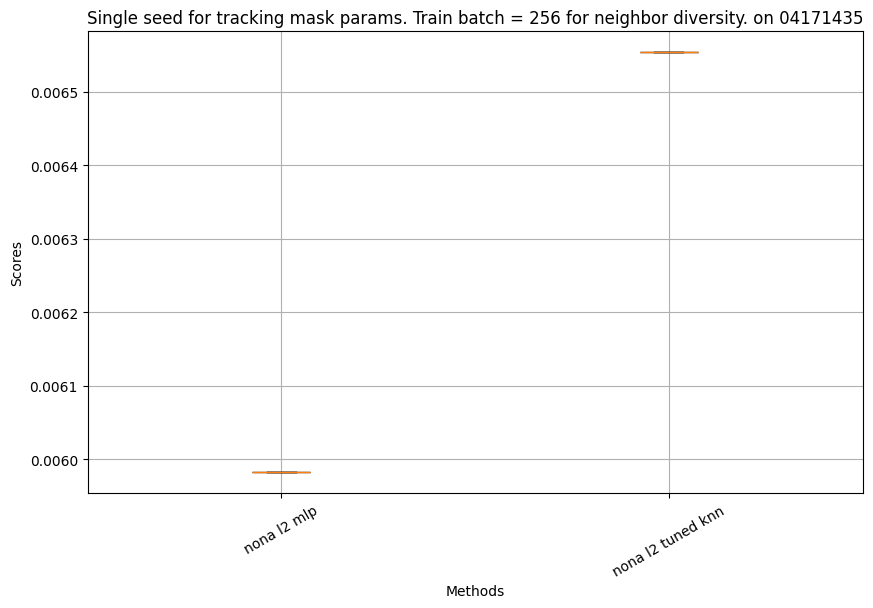

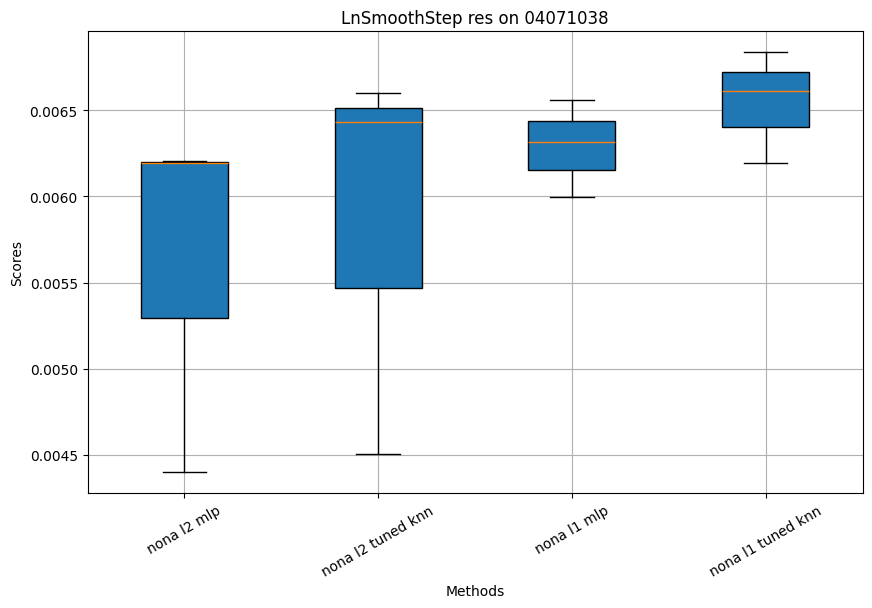

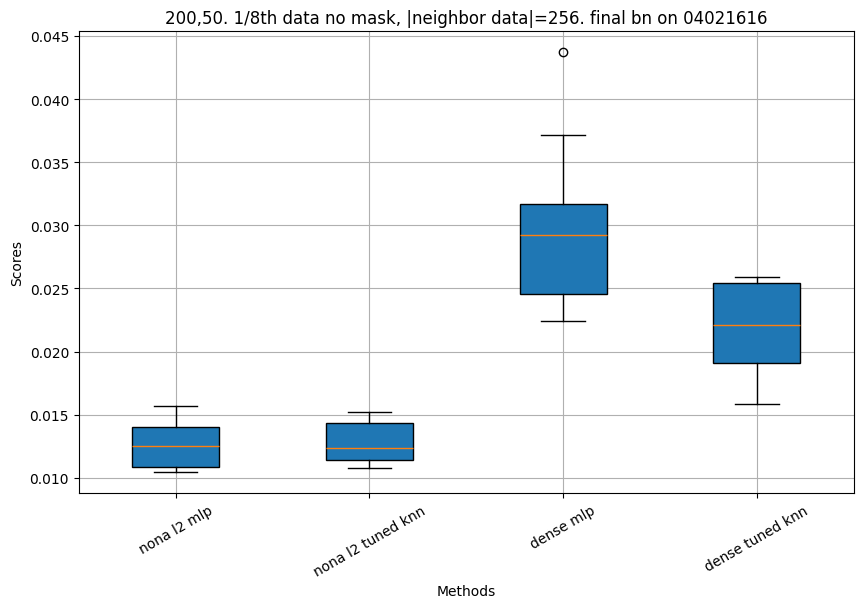

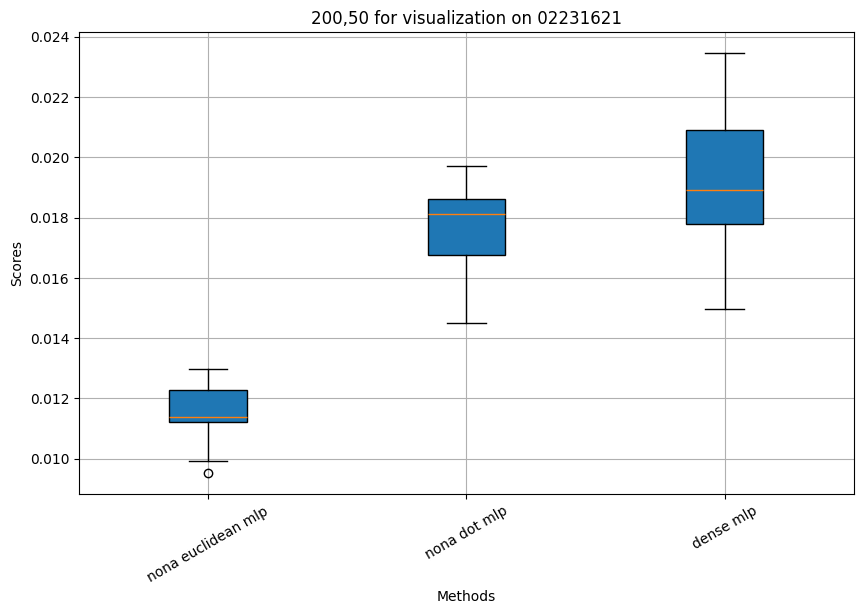

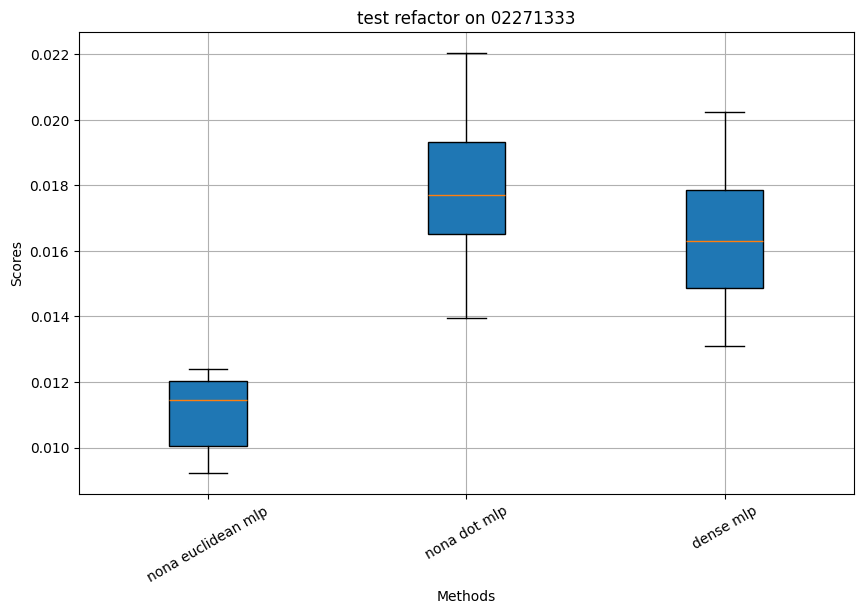

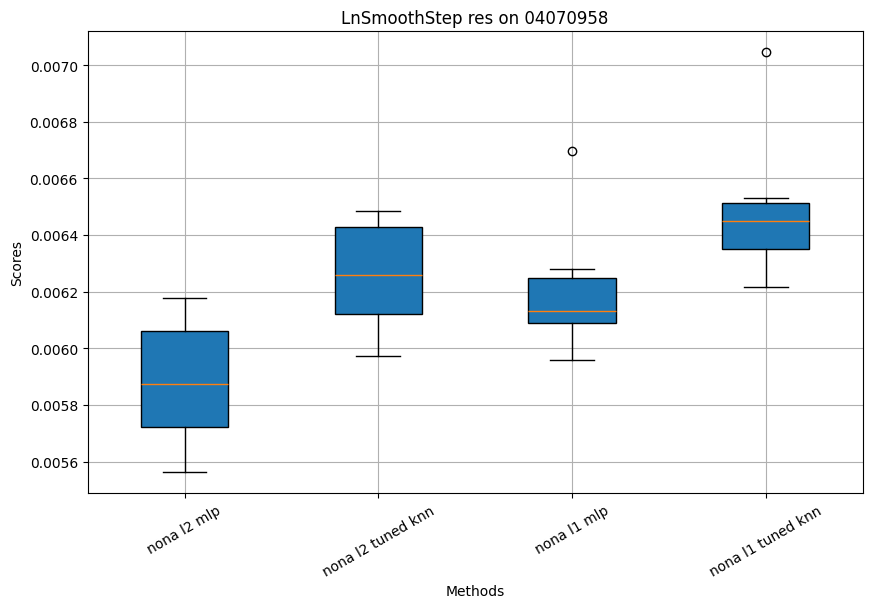

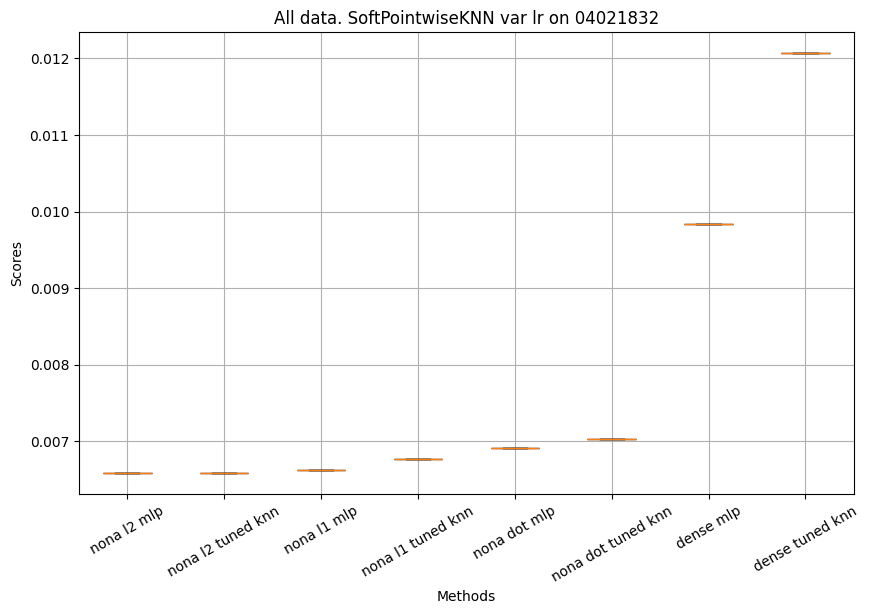

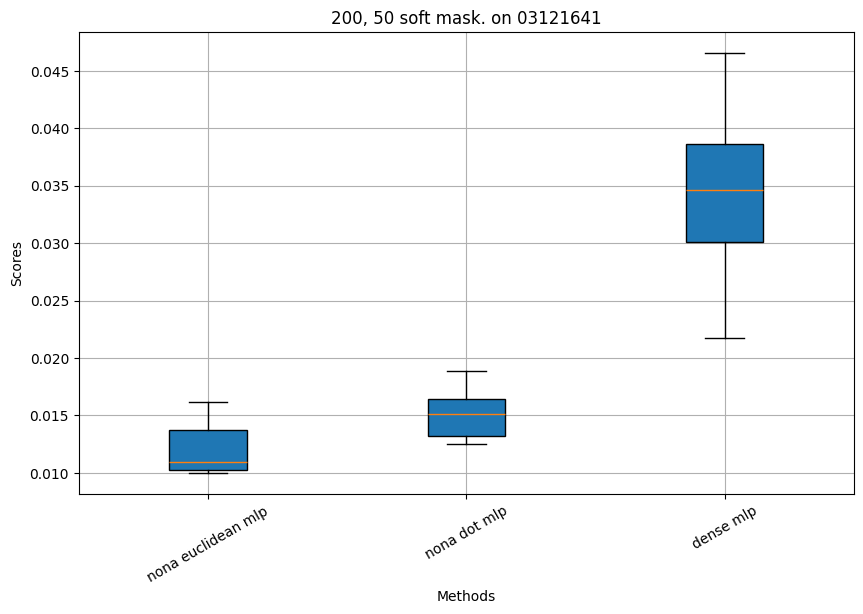

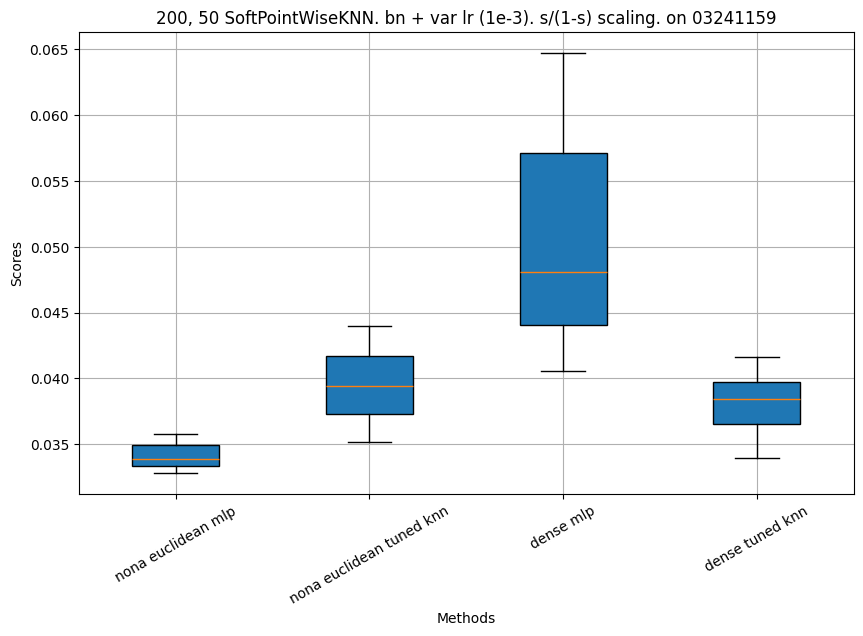

In [9]:
results_dir = "results/rsna"
nona_l2_medians = []
for file_name in os.listdir(results_dir):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(results_dir, file_name)
        date = file_name.split('_')[1]
        date = date.split('.')[0]

        with open(file_path, "rb") as file:
            results = pkl.load(file)
            
            if isinstance(results[0], str):
                desc = results[0]
                scores_list = results[1:]
            else:
                desc = results[-1]
                scores_list = results[:-1]
            
            scores = {
                method: [abs(scores[method][0]) for scores in scores_list]
                for method in scores_list[0]
            }
            
            df = pd.DataFrame(scores)
            if 'dense mlp' in df.columns:
                median_nona_l2 = df['dense mlp'].median()
                nona_l2_medians.append([median_nona_l2, date])

            plt.figure(figsize=(10, 6))
            plt.boxplot(df.values, tick_labels=df.columns, vert=True, patch_artist=True)
            plt.xticks(rotation=30)
            plt.title(f'{desc} on {date}')
            plt.xlabel("Methods")
            plt.ylabel("Scores")
            plt.grid(True)
            plt.show(block=True)

In [10]:
sorted(nona_l2_medians, key = lambda x: x[0])

[[np.float64(0.005759380757808685), '02211525'],
 [np.float64(0.006053136428818107), '02191706'],
 [np.float64(0.0064361789263784885), '04022314'],
 [np.float64(0.006836822722107172), '04021649'],
 [np.float64(0.007264029001817107), '04111459'],
 [np.float64(0.009833104908466339), '04021832'],
 [np.float64(0.010107929818332195), '02192020'],
 [np.float64(0.012620610184967518), '02271255'],
 [np.float64(0.012761983089148998), '02211204'],
 [np.float64(0.016208522021770477), '02211636'],
 [np.float64(0.01629225304350257), '02271333'],
 [np.float64(0.01886102184653282), '03051706'],
 [np.float64(0.018911726772785187), '02231621'],
 [np.float64(0.01934894360601902), '03051759'],
 [np.float64(0.019544918090105057), '02241239'],
 [np.float64(0.020913864485919476), '03131129'],
 [np.float64(0.02925411332398653), '04021616'],
 [np.float64(0.03462355025112629), '03121641'],
 [np.float64(0.03655649721622467), '03052149'],
 [np.float64(0.037340011447668076), '03171950'],
 [np.float64(0.0385022722

In [41]:
[-scores['nona l2 mlp + pointwise mask '][0] for scores in scores_list]

[0.024443425238132477,
 0.026385528966784477,
 0.020165573805570602,
 0.022179068997502327,
 0.025849200785160065,
 0.025540655478835106,
 0.02477521263062954,
 0.02429283782839775,
 0.024332042783498764,
 0.026973579078912735]

In [4]:
import torch
from torch.nn.functional import sigmoid
# model_objs = torch.load('results/adresso/mmse/models/04201054/nona l2_2.pth', map_location='cpu')
# first, last = model_objs['mask params'][0], model_objs['mask params'][-1]
def params(tensor):
    tensor = sigmoid(tensor)
    tensor[1] = tensor[0] + tensor[1]*(1-tensor[0])
    return tensor

# first, last = params(first), params(last)
# first, last

In [2]:
from importlib import reload
import similarity_masks
import ft_cnn_2
import models
import torch
from torch.utils.data import TensorDataset, DataLoader
from copy import deepcopy

/sc/arion/projects/pandeg01a/susmaa01/nona/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
reload(similarity_masks)
reload(models)
reload(ft_cnn_2)
saved_model_objs = torch.load('results/rsna/models/04202111/nona l2_2.pth', map_location='cpu')
model_objs = deepcopy(saved_model_objs)

z_loaders ={}
for fold in ['train', 'test', 'val']:
    if fold == 'train':
        batch_size = 512
        shuffle = True
    else:
        batch_size = 128
        shuffle = False
    z_dataset = TensorDataset(model_objs[f'z_{fold}'], model_objs[f'y_{fold}'])
    z_loader = DataLoader(z_dataset, batch_size=batch_size, shuffle=shuffle)
    z_loaders[fold] = z_loader
model_objs, scores = ft_cnn_2.train_eval_mask(train=z_loaders['train'], 
                val=z_loaders['val'], 
                test=z_loaders['test'], 
                model_objs=model_objs, lr=1e-3)
scores

Mask epoch: 1
Train Loss:  0.00245
Mask epoch: 2
Train Loss:  0.00234
Mask epoch: 3
Train Loss:  0.00229
Mask epoch: 4
Train Loss:  0.00226
Mask epoch: 5
Train Loss:  0.00225
Mask epoch: 6
Train Loss:  0.00223
Mask epoch: 7
Train Loss:  0.00222
Mask epoch: 8
Train Loss:  0.00218
Mask epoch: 9
Train Loss:  0.00217
Mask epoch: 10
Train Loss:  0.00217
Mask epoch: 11
Train Loss:  0.00214: Val Score:  0.00589
Mask epoch: 12
Train Loss:  0.00213: Val Score:  0.00588
Mask epoch: 13
Train Loss:  0.00210: Val Score:  0.00588
Mask epoch: 14
Train Loss:  0.00210: Val Score:  0.00587
Mask epoch: 15
Train Loss:  0.00210: Val Score:  0.00586
Mask epoch: 16
Train Loss:  0.00209: Val Score:  0.00586
Mask epoch: 17
Train Loss:  0.00208: Val Score:  0.00586
Mask epoch: 18
Train Loss:  0.00209: Val Score:  0.00585
Mask epoch: 19
Train Loss:  0.00209: Val Score:  0.00585
Mask epoch: 20
Train Loss:  0.00209: Val Score:  0.00585
Mask epoch: 21
Train Loss:  0.00209: Val Score:  0.00584
Mask epoch: 22
Train L

{'nona l2 mlp + pointwise mask + mlp': [-0.005747903138399124,
  65.02619051933289],
 'nona l2 mlp + pointwise mask': [-0.005747826304286718, 94.19940209388733],
 'nona l2 mlp + uniform mask': [-0.005805706139653921, 119.2746913433075],
 'nona l2 tuned knn': [-0.0060787987895309925, 20.375185012817383]}

In [15]:
pd.DataFrame(scores).iloc[2]

nona l2 mlp + pointwise mask +    0.005735
nona l2 mlp + pointwise           0.005721
nona l2 mlp + uniform             0.005861
nona l2 tuned                     0.006079
Name: 2, dtype: float64

In [5]:
params(model_objs['mask params'][0]), params(model_objs['mask params'][-1])

(tensor([0.4813, 0.8563, 0.6852]), tensor([0.4813, 0.8930, 0.7628]))